<a href="https://colab.research.google.com/github/sauravkokane/Bank-Calls-Success-predictions/blob/master/Bank_Calls_Success_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting Drive to notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os

## Load Dataset

1.  Title: Bank Marketing (with social/economic context)

2.  Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

   This dataset is based on *Bank Marketing* UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included.
   
   The zip file includes two datasets:
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   #### bank client data:

| no | column name | description |
|----|-------------|-------------|
| 1 | age (numeric) | Age of customer |
| 2 | job | type of job<br />(categorical: *admin.*, *blue-collar*, *entrepreneur*, *housemaid*, *management*, *retired*, *self-employed*, *services*, *student*, *technician*, *unemployed*, *unknown*) |
| 3 | marital | marital status<br /> (categorical: *divorced*, *married*, *single*, *unknown*; note: *divorced* means divorced or widowed) |
| 4 | education | Education level<br /> (categorical: *basic.4y*, *basic.6y*, *basic.9y*, *high.school*, *illiterate*, *professional.course*, *university.degree*, *unknown*) |
 | 5 | default | has credit in default?<br /> (categorical: *no*, *yes*, *unknown*) |
 | 6 | housing |has housing loan?<br /> (categorical: *no*, *yes*, *unknown*) |
 | 7 | loan | has personal loan?<br /> (categorical: *no*, *yes*, *unknown*) |
 | |  | # related with the last contact of the current campaign: |
 | 8 | contact | contact communication type<br /> (categorical: *cellular*, *telephone*)  |
 | 9 | month | last contact month of year<br /> (categorical: *jan*,  *feb*,  *mar*,  ..., *nov*,  *dec*)
| 10 | day_of_week | last contact day of the week<br /> (categorical: *mon*, *tue*, *wed*, *thu*, *fri*)
| 11 | duration | last contact duration, in seconds (numeric).<br /> Important note:  this attribute highly affects the output target (e.g., if duration=0 then y=*no*). <br />Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.<br />Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| |  | # other attributes:
| 12 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 13 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 14 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 15 | poutcome | outcome of the previous marketing campaign<br /> (categorical: *failure*, *nonexistent*, *success*) |
| | | # social and economic context attributes
| 16 | emp.var.rate | employment variation rate - quarterly indicator (numeric)
| 17 | cons.price.idx | consumer price index - monthly indicator (numeric)     
| 18 | cons.conf.idx | consumer confidence index - monthly indicator (numeric)|   
| 19 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 20 | nr.employed | number of employees - quarterly indicator (numeric) |


  ** Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: *yes*, *no*) **

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the *unknown* label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


| Column Type | Column Names |
|---|---|
| Numeric | age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed |
| Object | job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y |
| Categorical | job, marital, education, default, housing, loan, contact, month, day_of_week, previous, poutcome, y |

In [3]:
DATASET_FOLDER_PATH = "/content/drive/MyDrive/Datasets/bank-additional/bank-additional"

In [4]:
for files in os.listdir(DATASET_FOLDER_PATH):
  print(files)

bank-additional.csv
.Rhistory
.DS_Store
bank-additional-full.csv
.ipynb_checkpoints
bank-additional-names.txt
metadata.md


In [5]:
def load_data(data_dir, separator):
    from sklearn.model_selection import train_test_split
    df_train = pd.read_csv(os.path.join(data_dir, "bank-additional-full.csv"), sep=separator)
    df_train, df_test = train_test_split(df_train, test_size=0.3, random_state=42)
    df_val = pd.read_csv(os.path.join(data_dir, "bank-additional.csv"), sep=separator)
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    return df_train, df_test, df_val

In [6]:
df_train, df_test, df_val = load_data(DATASET_FOLDER_PATH, ";")

## Explore Dataset

### Exploring Functions

#### Exploration

In [27]:
def get_numeric_or_categorical_columns(df, target_column=None, categorical_threshold=10, ignore_columns=[]):
    columns = df.columns.tolist()
    if target_column:
        columns.remove(target_column)
    columns = [col for col in columns if col not in ignore_columns]
    numeric_cols = df[columns].select_dtypes(include=np.number).columns.tolist()
    object_cols = df[columns].select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols = [
        col for col in columns
        if (col not in numeric_cols) or
        df[col].nunique()<=categorical_threshold
    ]
    return columns, numeric_cols, object_cols, categorical_cols

In [8]:
def calculate_woe(df, feature, target):
    unique_targets = df[target].unique()
    if len(unique_targets) != 2:
        raise ValueError(f"Target column '{target}' should have exactly 2 unique values.")
    total_good = df[target].value_counts().iloc[1]
    total_bad = df[target].value_counts().iloc[0]
    woe_dict = {}
    for category in df[feature].unique():
        good = df[(df[feature] == category) & (df[target] == unique_targets[1])].shape[0]
        bad = df[(df[feature] == category) & (df[target] == unique_targets[0])].shape[0]
        good = good + 0.05 if good == 0 else good
        bad = bad + 0.05 if bad == 0 else bad
        p_good = good / total_good
        p_bad = bad / total_bad
        woe = np.log(p_good / p_bad) if p_bad != 0 else 0
        woe_dict[category] = woe
    return woe_dict

In [9]:
def calculate_predictability(df, feature, target, event=1):
    unique_targets = df[target].unique()
    feature_variable = df[[feature]].values
    target_variable = df[target].values
    if len(unique_targets) != 2:
        raise ValueError(f"Target column '{target}' should have exactly 2 unique values.")


#### Visualization

In [54]:
def get_univariate_distribution_plot(df, column_names=[], **kwargs):
    """
    Generates univariate distribution plots for specified columns in a DataFrame.

    This function creates various types of plots to visualize the distribution of data
    within individual columns of a Pandas DataFrame. It supports different plot types
    like histograms, KDE plots, box plots, and more.

    Args:
        df (pd.DataFrame): The Pandas DataFrame containing the data.
        column_names (list, optional): A list of column names to plot.
            If empty, all numeric columns might be plotted (depending on how it's called).
            Defaults to [].
        **kwargs: Keyword arguments for plot customization. Options include:
            hue (str, optional): Column name for color-coding data points (categorical grouping).
                Defaults to None.
            plot_type (str, optional): The type of plot to create.
                Options: 'kde', 'kde+means', 'hist', 'hist+means', 'histogram', 'count', 'box'.
                Defaults to 'hist'.
            ticks_rotation (int, optional): Rotation angle for x-axis ticks. Defaults to 0.

    Returns:
        None: The function displays the plots using matplotlib.pyplot.show().

    Example:
        >>> get_univariate_distribution_plot(df, column_names=['age', 'income'], plot_type='box', hue='gender')
    """

    hue = kwargs.get('hue', None)
    plot_type = kwargs.get('plot_type', "")
    ticks_rotation = kwargs.get('ticks_rotation', 0)

    num_plots = len(column_names)
    ncols = int(np.ceil(np.sqrt(num_plots)))
    nrows = int(np.ceil(num_plots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.ravel() if (isinstance(axes, np.ndarray)) else [axes]



    for i, col in enumerate(column_names):
        ax = axes[i]

        plot_functions = {
            'kde' : sns.kdeplot,
            'kde+means': sns.kdeplot,
            'hist' : sns.histplot,
            'hist+means': sns.histplot,
            'histogram': sns.histplot,
            'dist': sns.displot, # its depricated in new versions of seaborn, use it carefully
            'count': sns.countplot,
            'box': sns.boxplot,
            'violin': sns.violinplot
        }
        plot_func = plot_functions.get(plot_type, sns.kdeplot)
        plot_kwargs = {
                    "x": col,
                    "data": df,
                    "ax": ax,
                    "hue": hue
        }

        # Add specific arguments for certain plot types
        if plot_type in ("kde", "kde+means"):
            plot_kwargs["fill"] = True
            plot_kwargs["legend"] = True

        elif plot_type in ("hist", "hist+means", "histogram"):
            plot_kwargs["kde"] = True

        plot_func(**plot_kwargs)

        if plot_type == "kde+means":
            ax.axvline(df[col].mean(), color='red', linestyle=':', label=f"mean({col})")
            if hue:
                colors = sns.color_palette("hls", len(df[hue].unique()))
                for idx, group_name in enumerate(df[hue].unique()):
                    group_mean = df[df[hue] == group_name][col].mean()
                    ax.axvline(group_mean, color=colors[-(idx+1)], linestyle='--', label=f"mean({hue}={group_name})")
                ax.legend()
        if plot_type == "hist+means":
            ax.axvline(df[col].mean(), color='red', linestyle=':', label=f"mean({col})")
            if hue:
                colors = sns.color_palette("hls", len(df[hue].unique()))
                for idx, group_name in enumerate(df[hue].unique()):
                    group_mean = df[df[hue] == group_name][col].mean()
                    ax.axvline(group_mean, color=colors[-(idx+1)], linestyle='--', label=f"mean({hue}={group_name})")
                ax.legend()

        ax.set_title(f'Distribution of {col}')
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        ax.spines[['right', 'top']].set_visible(False)
        ax.tick_params(axis='x', rotation=ticks_rotation, which='major', direction='out')
        # ax.legend()

    # Hide unused subplots
    for ax in axes[num_plots:]:
        ax.remove()
    plt.tight_layout()
    plt.show()

In [50]:
def get_bivariate_distribution_plot(df, column_names=[], **kwargs):
    """
    Generates bivariate distribution plots for specified column pairs in a DataFrame.

    This function creates various types of plots to visualize the relationship between
    two columns within a Pandas DataFrame. It supports different plot types like scatter
    plots, line plots, joint plots, KDE plots, violin plots, and more.

    Args:
        df (pd.DataFrame): The Pandas DataFrame containing the data.
        column_names (list of tuples): A list of tuples, where each tuple contains
            the names of two columns to plot. For example: [('col1', 'col2'), ('col3', 'col4')].
        **kwargs: Keyword arguments for plot customization. Options include:
            hue (str, optional): Column name for color-coding data points (categorical grouping).
                Defaults to None.
            plot_type (str, optional): The type of plot to create. Options: 'scatter', 'line', 'joint',
                'kde', 'violin', 'reg', 'bar', 'box'. Defaults to 'scatter'.
            ticks_rotation (int, optional): Rotation angle for x-axis ticks. Defaults to 0.

    Returns:
        None: The function displays the plots using matplotlib.pyplot.show().

    Example:
        >>> get_bivariate_distribution_plot(df, column_names=[('age', 'income'), ('education', 'income')], plot_type='scatter', hue='gender')
    """

    # ... (rest of the function code) ...
    hue = kwargs.get('hue', None)
    plot_type = kwargs.get('plot_type', "")
    ticks_rotation = kwargs.get('ticks_rotation', 0)

    num_plots = len(column_names)
    ncols = int(np.ceil(np.sqrt(num_plots)))
    nrows = int(np.ceil(num_plots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.ravel() if isinstance(axes, np.ndarray) else [axes]


    # Dictionary for plot types and functions
    plot_functions = {
        "scatter": sns.scatterplot,
        "line": sns.lineplot,
        "joint": sns.jointplot,
        "kde": sns.kdeplot,
        "violin": sns.violinplot,
        "reg": sns.regplot,
        "bar": sns.barplot,
        "box": sns.boxplot
    }

    for i, (xcol, ycol) in enumerate(column_names):
        ax = axes[i]

        if plot_type == "joint":
            sns.jointplot(x=xcol, y=ycol, data=df, kind="hex")
            continue  # Skip further customization for jointplot

        plot_func = plot_functions.get(plot_type, sns.scatterplot)
        plot_func(x=xcol, y=ycol, data=df, ax=ax, hue=hue)

        ax.set_title(f'Distribution of {xcol} vs {ycol}')
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        # Remove spines with a single line
        ax.spines[['right', 'top']].set_visible(False)

        ax.tick_params(axis='x', rotation=ticks_rotation, which='major', direction='out')

    # Hide unused subplots
    for ax in axes[num_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

#### general usage functions

In [12]:
def pair_columns_with(first, *column_names, axis=0):
    if axis in [1, 'y', 'Y']:
        return [(col, first) for col in column_names]
    return [(first, col) for col in column_names]

In [13]:
from itertools import combinations
def pair_columns(*column_names):
    return list(combinations(column_names, 2))

### manupulation functions

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [15]:
def convert_discrete_columns_to_category(df, exclude_cols=[], threshold=10):
    """Converts columns with discrete values in a DataFrame to the 'category' data type.

    Args:
        df: The input pandas DataFrame.
        threshold: The maximum number of unique values for a column to be considered discrete.

    Returns:
        A new DataFrame with specified columns converted to 'category' type.
    """
    df = df.copy()
    for col in df.columns:
        if (
            df[col].dtype == 'object' or
            df[col].nunique() < threshold
        ) and col not in exclude_cols:
            df[col] = df[col].astype('category')

    return df


In [16]:
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.05, upper=0.95):
        self.lower = lower
        self.upper = upper
        self.lower_limit = None
        self.upper_limit = None

    def fit(self, X, y=None):
        self.lower_limit = np.percentile(X, self.lower * 100, axis=0)
        self.upper_limit = np.percentile(X, self.upper * 100, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_limit, self.upper_limit)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X)


In [17]:
class WOEEncoder(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible Weight of Evidence (WOE) encoder.

    Parameters:
    -----------
    event : int or float, default=1
        The value in the target considered as the "event".

    epsilon : float, default=1e-10
        A small number to avoid division by zero.

    Attributes:
    -----------
    woe_dict_ : dict
        A dictionary mapping each feature column to its category-to-WOE mapping.
    """
    def __init__(self, event=1, epsilon=1e-10):
        self.event = event
        self.epsilon = epsilon

    def fit(self, X, y):
        """
        Fit the WOE encoder.

        Parameters:
        -----------
        X : array-like or DataFrame of shape (n_samples, n_features)
            Feature matrix with categorical variables.

        y : array-like of shape (n_samples,)
            Binary target variable.

        Returns:
        --------
        self : object
            Fitted encoder.
        """
        # convert to dataframe for easier processing
        X = pd.DataFrame(X)
        y = pd.Series(y)

        # calculate total events and non events
        total_events = (y == self.event).sum()
        total_non_events = (y != self.event).sum()

        self.woe_dict_ = {}
        for col in X.columns:
            # Create a temporary DataFrame with feature and target
            data = pd.DataFrame({'feature': X[col], 'target': y})
            # Group by feature values and calculate counts
            grouped = data.groupby('feature', observed=False)['target'].agg(
                events=lambda x: (x == self.event).sum(),
                non_events=lambda x: (x != self.event).sum()
            )
            # Compute percentages
            grouped['perc_events'] = grouped['events'] / total_events
            grouped['perc_non_events'] = grouped['non_events'] / total_non_events


             # Calculate WOE: natural log of the ratio between non-events and events
            grouped['woe'] = np.log(
                (grouped['perc_non_events'] + self.epsilon) / (grouped['perc_events'] + self.epsilon)
            )

            # Store the mapping for this column
            self.woe_dict_[col] = grouped['woe'].to_dict()

        return self

    def transform(self, X):
        """
        Transform the dataset by replacing categorical values with their WOE values.

        Parameters:
        -----------
        X : array-like or DataFrame of shape (n_samples, n_features)
            Feature matrix to transform.

        Returns:
        --------
        X_transformed : array-like of shape (n_samples, n_features)
            Transformed feature matrix with WOE values.
        """
        X = pd.DataFrame(X)
        X_transformed = X.copy()

        for col in X.columns:
            # Retrieve mapping for the current column; if missing, default to empty dict.
            mapping = self.woe_dict_.get(col, {})
            X_transformed[col] = X[col].map(mapping)
            # If unseen categories occur, fill with 0 (or you could choose another strategy)
            # X_transformed[col] = X_transformed[col].fillna(0)

        return X_transformed.values

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [18]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.frequencies_ = {}
        X = pd.DataFrame(X)
        X_transformed = X.copy()
        for col in X.columns:
            self.frequencies_[col] = X[col].value_counts().to_dict()
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        X_transformed = X.copy()
        for col in X.columns:
            mappings = self.frequencies_.get(col, {})
            X_transformed[col] = X[col].map(mappings)
        return X_transformed

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [19]:
class Categorizer(BaseEstimator, TransformerMixin):
    def __init__(self, bins=None, labels=None, bin_strategy='equal_width', n_bins=5):
        """
        Parameters:
        - bins: List of bin edges or None (to be determined dynamically).
        - labels: List of labels or List of List of labels (for multiple features).
        - bin_strategy: Strategy for dynamic binning ('equal_width' or 'equal_frequency').
        - n_bins: Number of bins if bins are generated dynamically.
        """
        self.bins = bins
        self.labels = labels
        self.bin_strategy = bin_strategy
        self.n_bins = n_bins
        self.fitted_bins_ = None  # Store bins after fit

    def fit(self, X, y=None):
        X = self._validate_input(X)

        if self.bins is None:
            self.fitted_bins_ = []
            for col in X.T:
                if self.bin_strategy == 'equal_width':
                    bins = np.linspace(np.nanmin(col)-1e-10, np.nanmax(col)+1e-10, self.n_bins + 1)
                elif self.bin_strategy == 'equal_frequency':
                    bins = np.percentile(col[~np.isnan(col)], np.linspace(0, 100, self.n_bins + 1))
                else:
                    raise ValueError("Unsupported bin_strategy. Use 'equal_width' or 'equal_frequency'.")
                self.fitted_bins_.append(bins)
        else:
            self.fitted_bins_ = self.bins
        return self

    def binner_(self, X):
        X = self._validate_input(X)
        X_transformed = []

        for i, col in enumerate(X.T):
            bins = self.fitted_bins_[i]

            if np.any((col < bins[0]) | (col > bins[-1])):
                raise ValueError(f"Values outside bin range for feature {i}. Provide better bins.")

            binned = np.digitize(col, bins, right=True) - 1
            if self.labels:
                feature_labels = self.labels[i] if isinstance(self.labels[0], list) else self.labels
                if len(feature_labels) != len(bins) - 1:
                    raise ValueError("Number of labels must match number of bins.")
                binned = np.array([feature_labels[idx] if 0 <= idx < len(feature_labels) else 'NaN_Bin' for idx in binned])
            else:
                bin_labels = [f"{np.round(bins[j], 5)}-{np.round(bins[j+1], 5)}" for j in range(len(bins)-1)]
                binned = np.array([bin_labels[idx] if 0 <= idx < len(bin_labels) else 'NaN_Bin' for idx in binned])

            if np.any(pd.isna(col)):
                print("Warning: Input contains NaN values. Consider handling them before binning.")
            X_transformed.append(binned)
        return np.array(X_transformed).T

    def transform(self, X, columns=None):
        X_transformed = self.binner_(X)
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X_transformed, columns=columns if columns else X.columns)
        return X_transformed

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

    def _validate_input(self, X):
        if isinstance(X, pd.DataFrame):
            return X.to_numpy()
        elif isinstance(X, np.ndarray) or isinstance(X, list):
            return np.array(X)
        else:
            raise TypeError("Input should be a pandas DataFrame, numpy array, or list.")

### Pipelines

In [20]:
winsorizer_robustScaler_pipe = make_pipeline(
    Winsorizer(lower=0, upper=0.95),
    RobustScaler()
)

winsorizor_logScaler_pipe = make_pipeline(
    Winsorizer(lower=0, upper=0.95),
    PowerTransformer()
)

targetEncode_robustScaler_pipe = make_pipeline(
    TargetEncoder(smooth=1),
    RobustScaler()
)

freqEncode_robustScaler_pipe = make_pipeline(
    FrequencyEncoder(),
    RobustScaler()
)

In [21]:
class Preprocessor(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible Target Encoder.

    Parameters:
    -----------
    process_and_columns : dict, default: {}
        A dictionary containing the processor configurations.
        It should have the following structure:
        {
            "target_encode_columns": {
                "columns": ["column1", "column2", ...],
                "event": 1
            },
            "woe_encode_columns": {
                "columns": ["column1", "column2", ...],
                "event": 1
            },
            "frequency_encode_columns": {
                "columns": ["column1", "column2", ...],
            }
        }
        valid keys for each processor are:
        {'target_encode_columns', 'woe_encode_columns', 'frequency_encode_columns',
         'label_encode_columns', 'winsorizer_robustScaler_columns', 'winsorizor_logScaler_columns',
         'targetEncode_robustScaler_columns', 'freqEncode_robustScaler_columns',
         'powerTransformer_columns', 'standardScaler_columns', 'robustScaler_columns'}
        }
    event : int or float, default=1
        The value in the target considered as the "event".

    epsilon : float, default=1e-10
        A small number to avoid division by zero.

    Attributes:
    -----------
    """
    def __init__(self, process_and_columns={}, target_event=1, epsilon=1e-10, remainder='drop',
                 winsorizer_robustScaler_pipe=None, winsorizor_logScaler_pipe=None,
                 targetEncode_robustScaler_pipe=None, freqEncode_robustScaler_pipe=None):

        # validate process_and_columns_keys
        for key in process_and_columns.keys():
            if key not in [
                "target_encode_columns","woe_encode_columns","frequency_encode_columns",
                "label_encode_columns","winsorizer_robustScaler_columns",
                "winsorizor_logScaler_columns","targetEncode_robustScaler_columns",
                "freqEncode_robustScaler_columns","powerTransformer_columns",
                "standardScaler_columns","robustScaler_columns"
            ]:
                raise ValueError(f"Invalid key in process_and_columns: {key}")



        self.process_and_columns = process_and_columns
        self.targetEncoding_columns = process_and_columns.get("target_encode_columns", [])
        self.woeEncoding_columns = process_and_columns.get("woe_encode_columns", [])
        self.frequencyEncoding_columns = process_and_columns.get("frequency_encode_columns", [])
        self.labelEncoder_columns = process_and_columns.get("label_encode_columns", [])
        self.winsorizer_robustScaler_columns = process_and_columns.get("winsorizer_robustScaler_columns", [])
        self.winsorizor_logScaler_columns = process_and_columns.get("winsorizor_logScaler_columns", [])
        self.targetEncode_robustScaler_columns = process_and_columns.get("targetEncode_robustScaler_columns", [])
        self.freqEncode_robustScaler_columns = process_and_columns.get("freqEncode_robustScaler_columns", [])
        self.powerTransformer_columns = process_and_columns.get("powerTransformer_columns", [])
        self.standardScaler_columns = process_and_columns.get("standardScaler_columns", [])
        self.robustScaler_columns = process_and_columns.get("robustScaler_columns", [])

        self.target_event = target_event,
        self.remainder = remainder
        self.epsilon = epsilon


        self.winsorizer_robustScaler_pipe = winsorizer_robustScaler_pipe
        self.winsorizor_logScaler_pipe = winsorizor_logScaler_pipe
        self.targetEncode_robustScaler_pipe = targetEncode_robustScaler_pipe
        self.freqEncode_robustScaler_pipe = freqEncode_robustScaler_pipe
        self.ct = None

    def fit(self, X, y):
        transformers = []

        if self.labelEncoder_columns:
            transformers.append(("label_encoder", OrdinalEncoder(), self.labelEncoder_columns))

        if self.targetEncoding_columns:
            transformers.append(("target_encoder", TargetEncoder(smooth=1), self.targetEncoding_columns))

        if self.woeEncoding_columns:
            transformers.append(("woe_encoder", WOEEncoder(event=self.target_event, epsilon=self.epsilon), self.woeEncoding_columns))

        if self.frequencyEncoding_columns:
            transformers.append(("freq_encoder", FrequencyEncoder(), self.frequencyEncoding_columns))

        if self.winsorizer_robustScaler_columns and self.winsorizer_robustScaler_pipe:
            transformers.append(("winsorizer_robustScaler", self.winsorizer_robustScaler_pipe, self.winsorizer_robustScaler_columns))

        if self.winsorizor_logScaler_columns and self.winsorizor_logScaler_pipe:
            transformers.append(("winsorizor_logScaler", self.winsorizor_logScaler_pipe, self.winsorizor_logScaler_columns))

        if self.targetEncode_robustScaler_columns and self.targetEncode_robustScaler_pipe:
            transformers.append(("targetEncode_robustScaler", self.targetEncode_robustScaler_pipe, self.targetEncode_robustScaler_columns))

        if self.freqEncode_robustScaler_columns and self.freqEncode_robustScaler_pipe:
            transformers.append(("freqEncode_robustScaler", self.freqEncode_robustScaler_pipe, self.freqEncode_robustScaler_columns))
        if self.powerTransformer_columns:
            transformers.append(("powerTransformer", PowerTransformer(), self.powerTransformer_columns))
        if self.standardScaler_columns:
            transformers.append(("standardScaler", StandardScaler(), self.standardScaler_columns))
        if self.robustScaler_columns:
            transformers.append(("robustScaler", RobustScaler(), self.robustScaler_columns))


        self.ct_ = ColumnTransformer(transformers=transformers, remainder=self.remainder)
        self.ct_.fit(X, y)
        return self
    def transform(self, X, y=None):
        X = self.ct_.transform(X)
        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X, y)

### permenent transformations

In [22]:
def convert_continuous_columns_to_segments(df, columns, bins, labels, transormExisting=False):
    df = df.copy()
    # handle there are no labels given

    if transormExisting:
        for col, bin, label  in zip(columns, bins, labels):
            if not label:
                df[col] = pd.cut(df[col], bins=bin, include_lowest=True)
            else:
                df[col] = pd.cut(df[col], bins=bin, labels=label, include_lowest=True)
    else:
        for col, bin, label  in zip(columns, bins, labels):
            df[f"{col}_segmented"] = pd.cut(df[col], bins=bin, labels=label, include_lowest=True)
    return df

### exploring

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  int64  
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp.var.rate    28831 non-null  float64
 16  cons.price.idx  28831 non-null  float64
 17  cons.conf.idx   28831 non-null 

In [24]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [25]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
all_columns, numeric_cols, object_cols, categorical_cols = get_numeric_or_categorical_columns(df_train)
print(f"All columns: {all_columns}")
print(f"Numeric columns: {numeric_cols}")
print(f"Object columns: {object_cols}")
print(f"Categorical columns: {categorical_cols}")

All columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Object columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'emp.var.rate', 'y']


In [31]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
1,29,technician,single,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
2,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3,34,services,married,university.degree,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
4,32,admin.,single,high.school,no,no,no,cellular,may,fri,...,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [32]:
df_train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28826,58,retired,married,professional.course,unknown,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28827,37,management,married,university.degree,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
28828,35,admin.,married,high.school,no,yes,no,cellular,oct,thu,...,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
28829,40,management,married,university.degree,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
28830,29,admin.,single,university.degree,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


In [33]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28831.0,40.011203,10.450128,17.000,32.000,38.000,47.000,98.000
duration,28831.0,257.875134,260.212911,0.000,102.000,180.000,318.000,4918.000
campaign,28831.0,2.575769,2.752303,1.000,1.000,2.000,3.000,43.000
pdays,28831.0,963.215844,185.077567,0.000,999.000,999.000,999.000,999.000
previous,28831.0,0.172592,0.494338,0.000,0.000,0.000,0.000,7.000
emp.var.rate,28831.0,0.083202,1.570978,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,28831.0,93.577264,0.579694,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,28831.0,-40.515091,4.634864,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,28831.0,3.621599,1.735202,0.634,1.344,4.857,4.961,5.045
nr.employed,28831.0,5167.011880,72.542598,4963.600,5099.100,5191.000,5228.100,5228.100


In [34]:
df_train.nunique()

,0
age,77
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [35]:
df_train['y'].value_counts()

,count
y,
no,25580
yes,3251


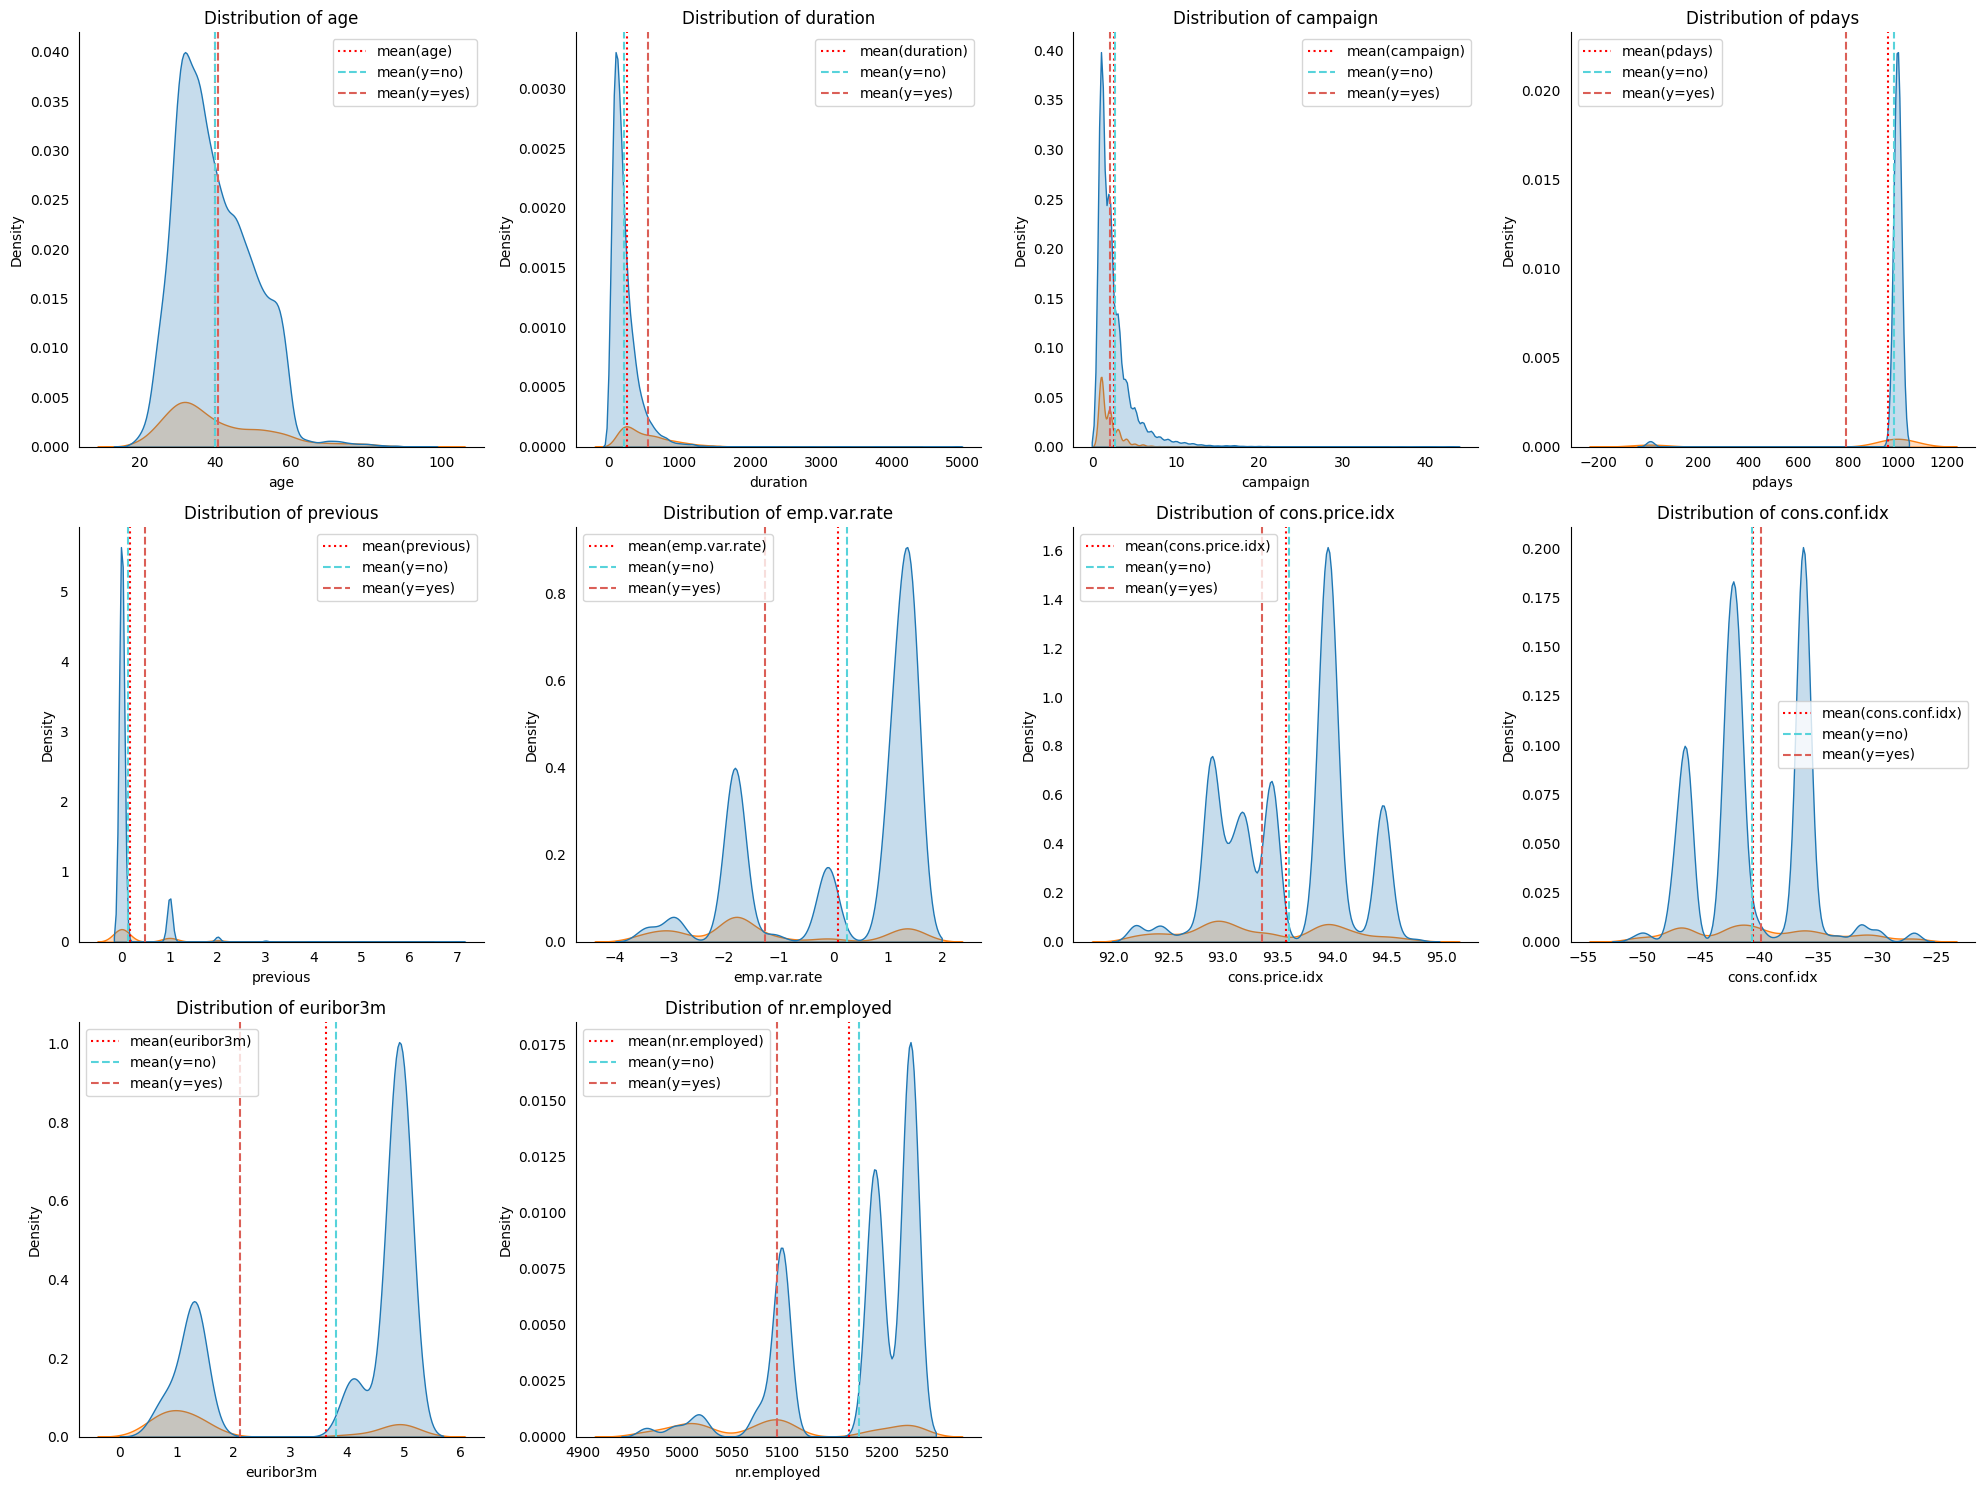

In [51]:
get_univariate_distribution_plot(df_train, column_names=numeric_cols, hue='y', plot_type="kde+means")

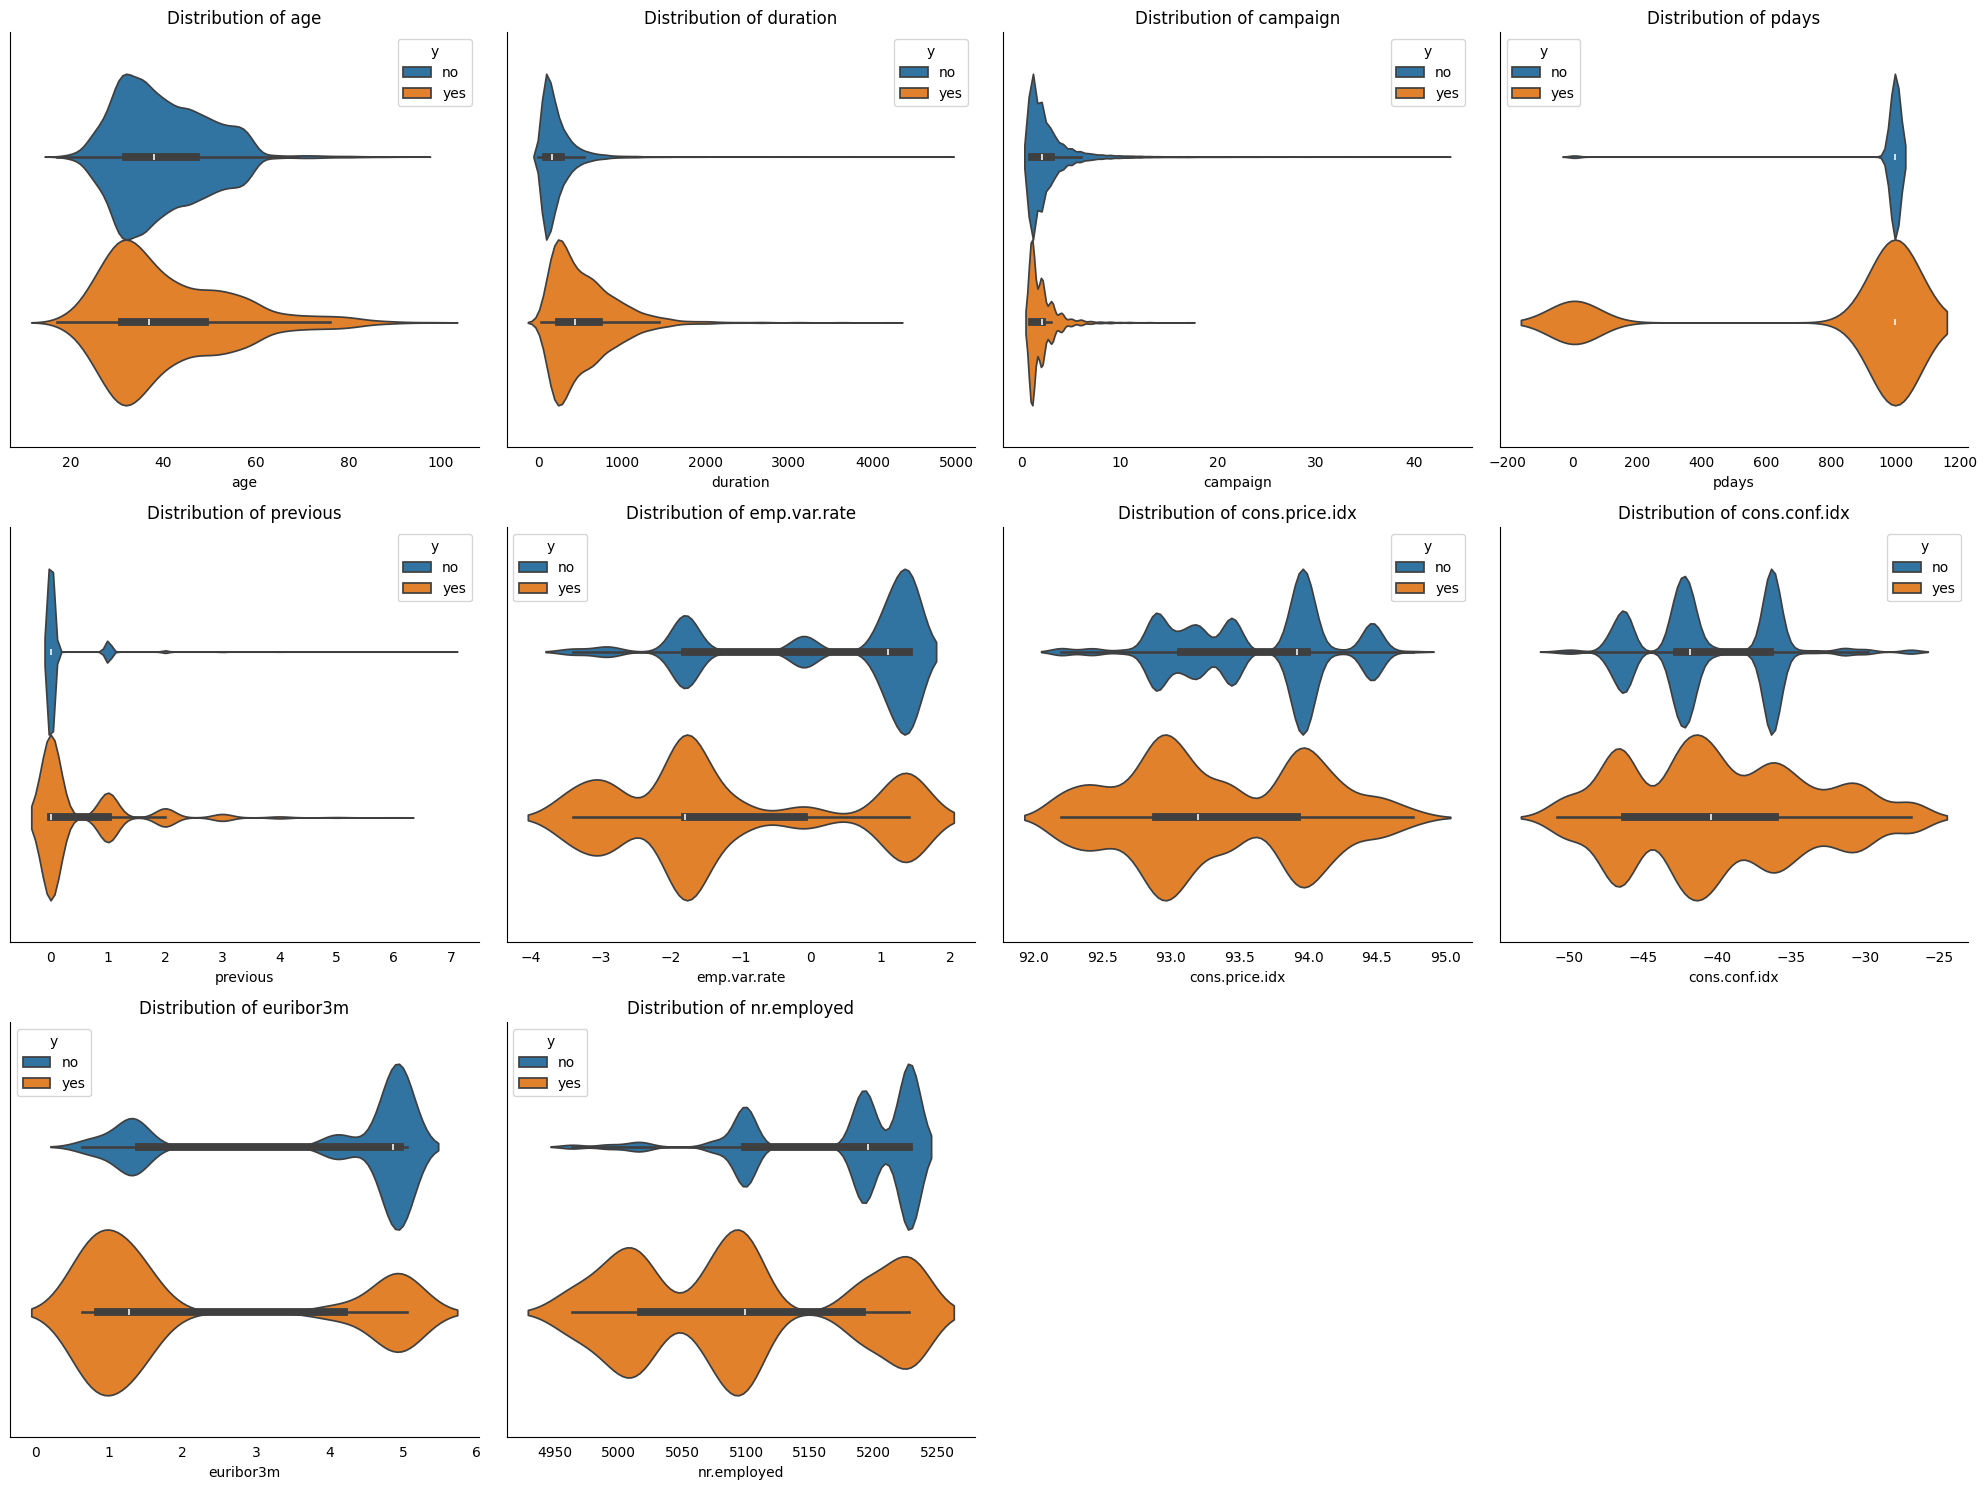

In [55]:
get_univariate_distribution_plot(df_train, column_names=numeric_cols, hue='y', plot_type="violin")

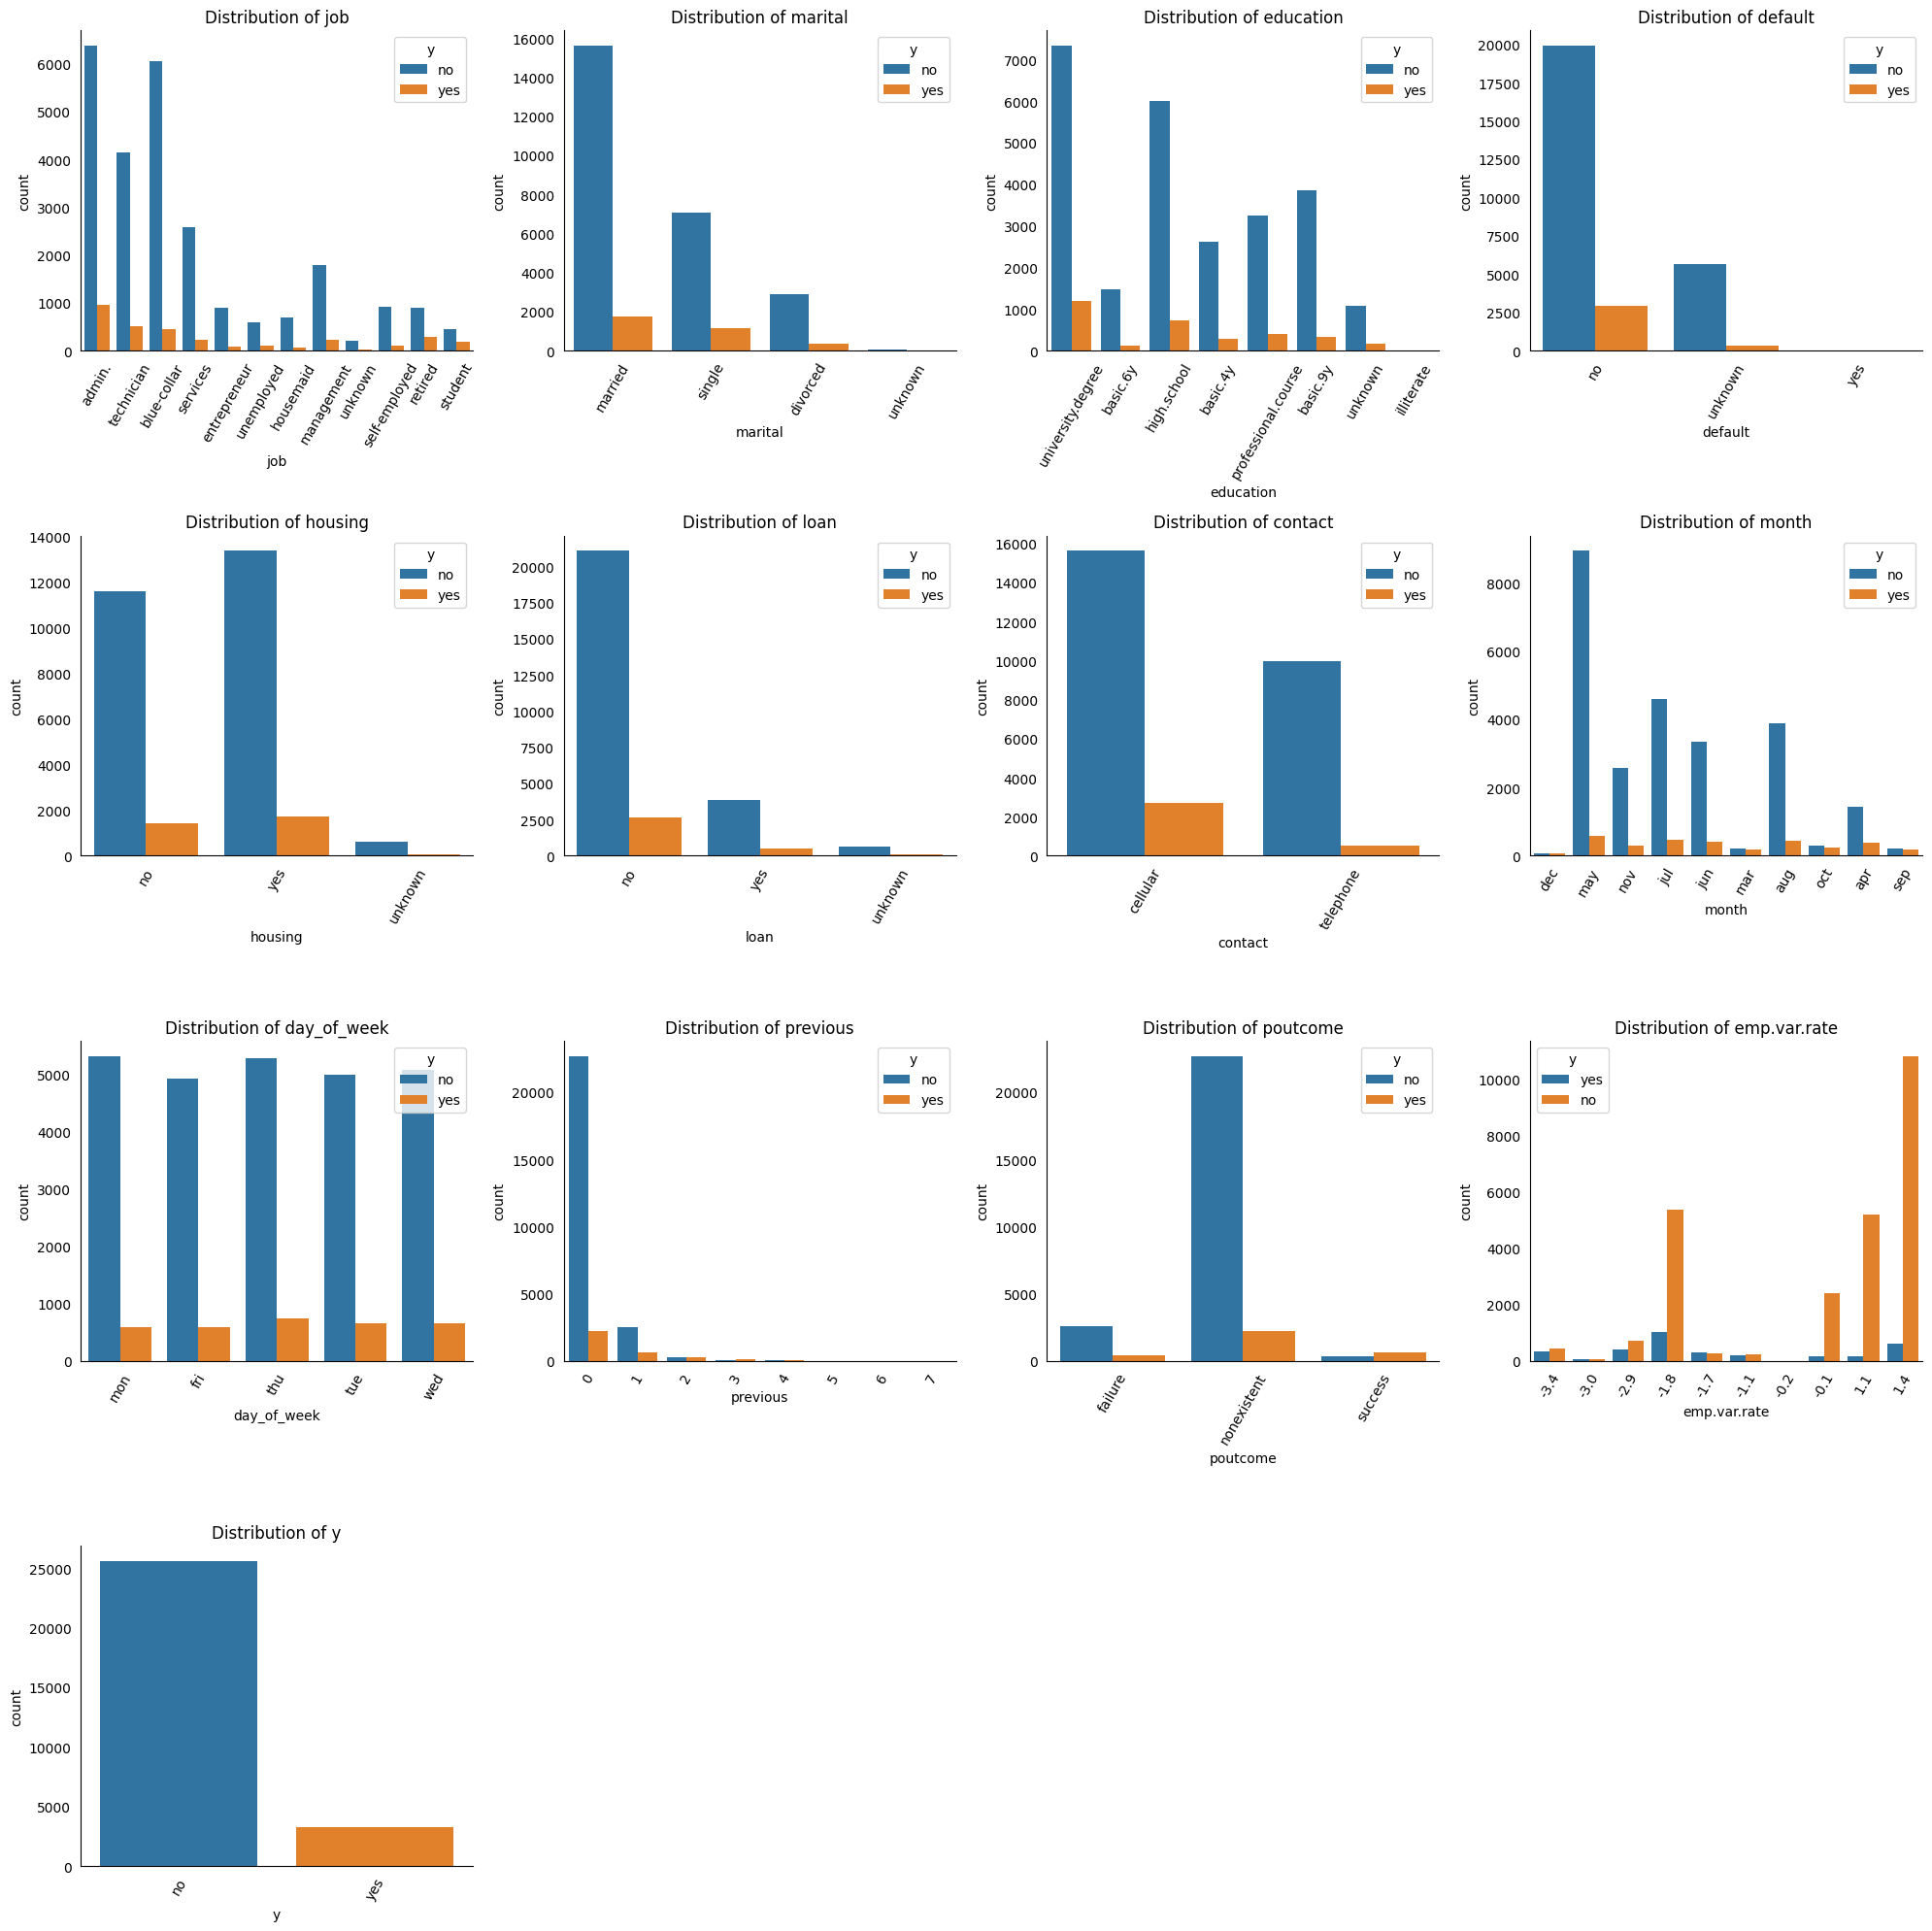

In [57]:
get_univariate_distribution_plot(df_train, column_names=categorical_cols, hue='y', plot_type="count", ticks_rotation=60)

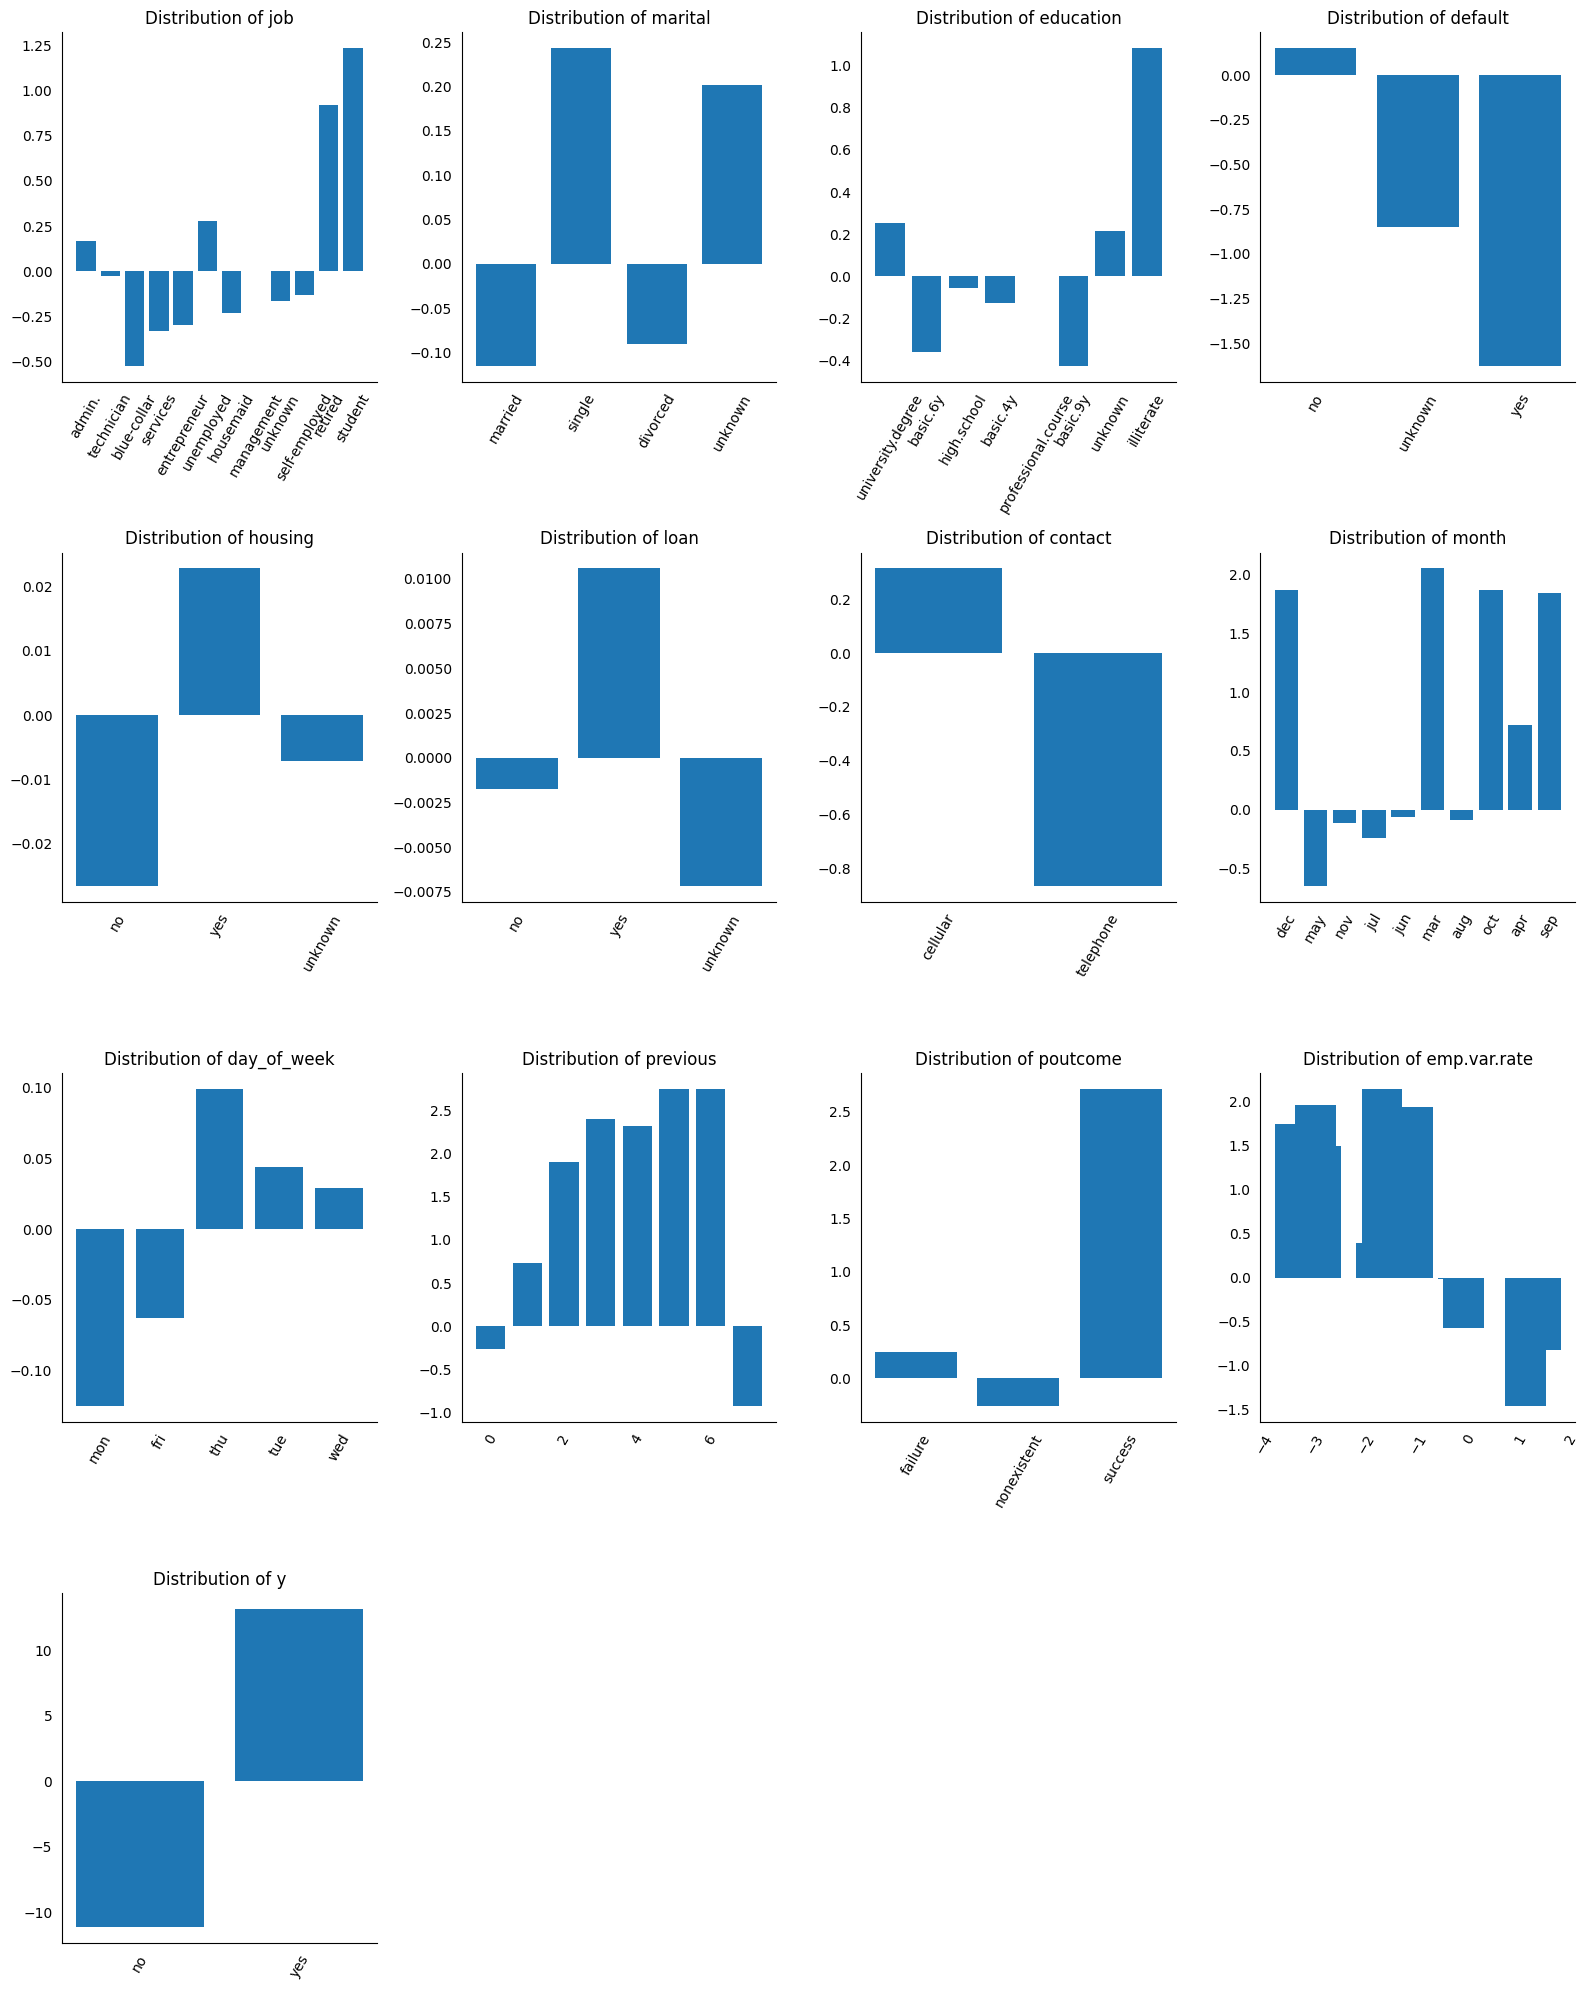

In [58]:
column_names = categorical_cols
n = len(column_names)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 5 * nrows))
if(isinstance(axes, np.ndarray)):
    axes = axes.flatten()
else:
    axes = [axes]
for i, col in enumerate(column_names):
    ax = axes[i]
    woe_dict = calculate_woe(df_train, col, "y")
    ax.bar(woe_dict.keys(), woe_dict.values())
    ax.set_title(f'Distribution of {col}')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', rotation=60, which='major', direction='out')
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [60]:
logScaler = PowerTransformer()
win = Winsorizer(lower=0, upper=0.99)
transformed_df = df_train[['age', 'duration', 'campaign', 'marital', 'job', 'education', 'contact']].copy()
transformed_df[['log_duration', 'log_campaign']] = logScaler.fit_transform(transformed_df[[ 'duration', 'campaign']])
transformed_df['wins_campaign'] = win.fit_transform(transformed_df[['campaign']])
transformed_df['y'] = df_train['y'].values
_, num_cols, obj_cols, _= get_numeric_or_categorical_columns(transformed_df)

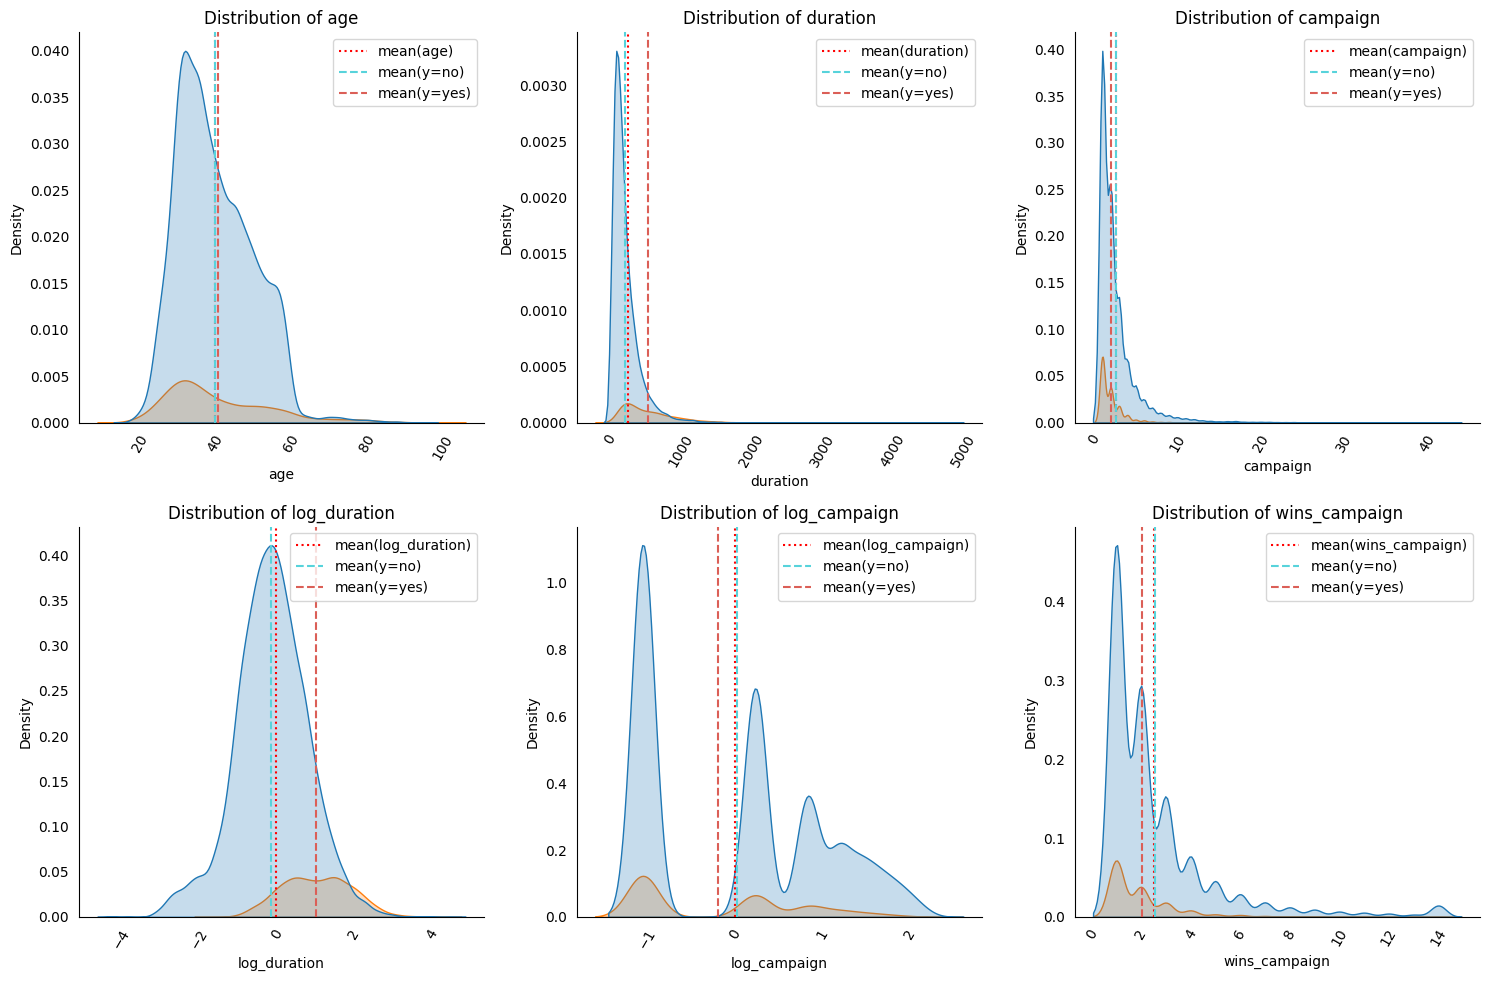

In [62]:
get_univariate_distribution_plot(transformed_df, num_cols, hue='y', plot_type="kde+means", ticks_rotation=60)

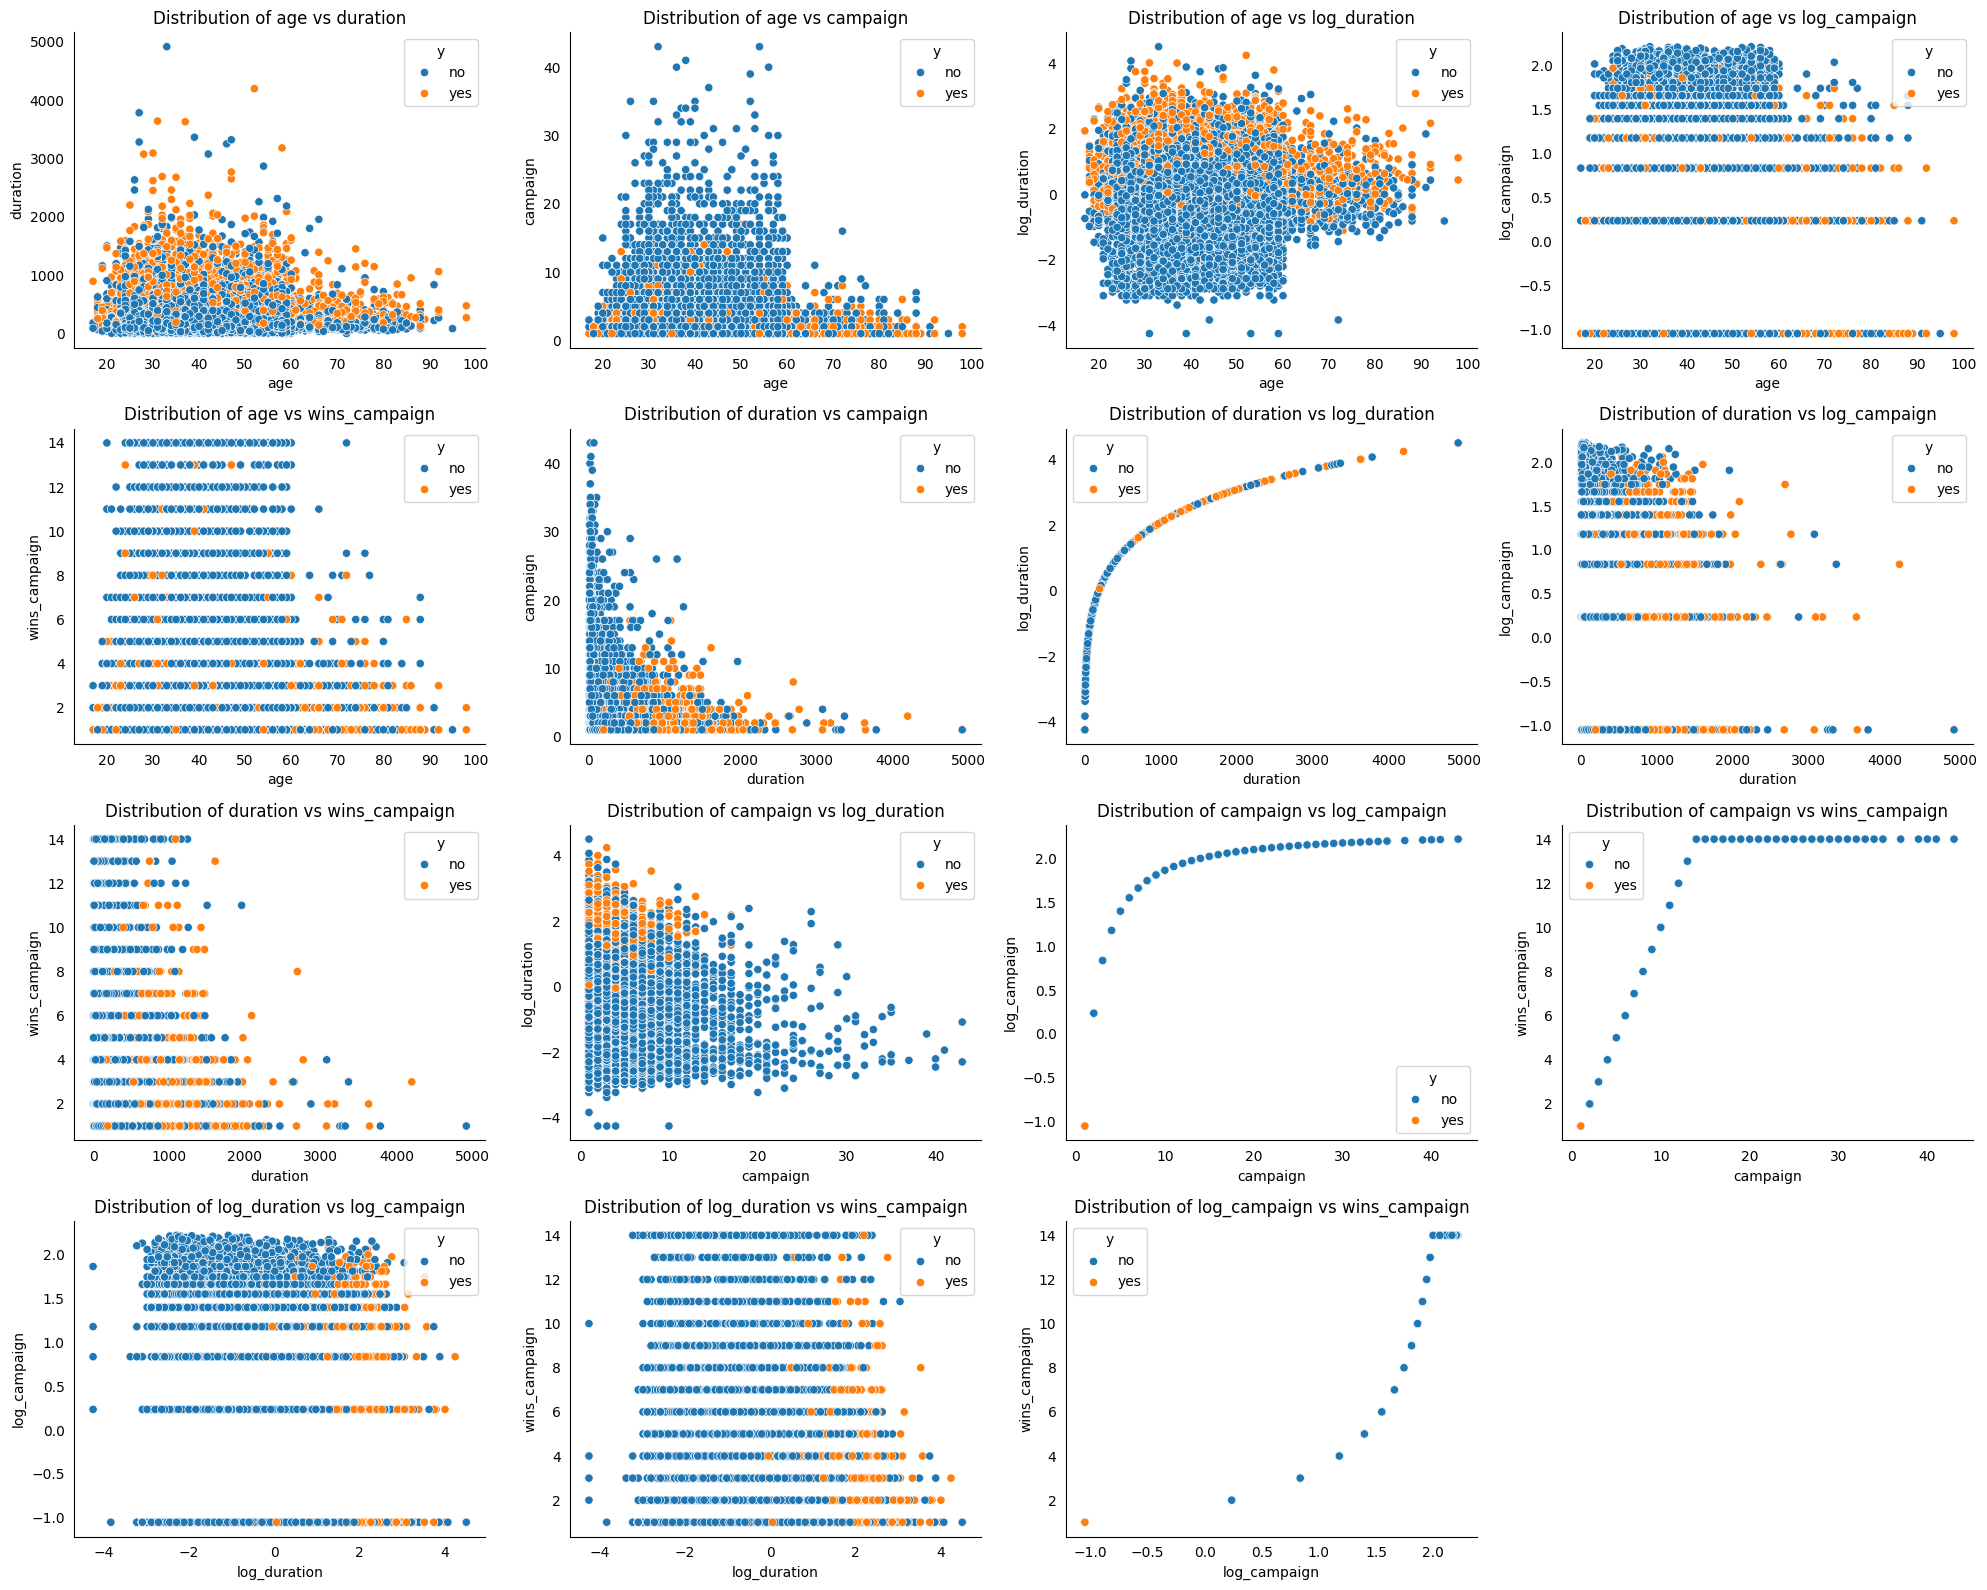

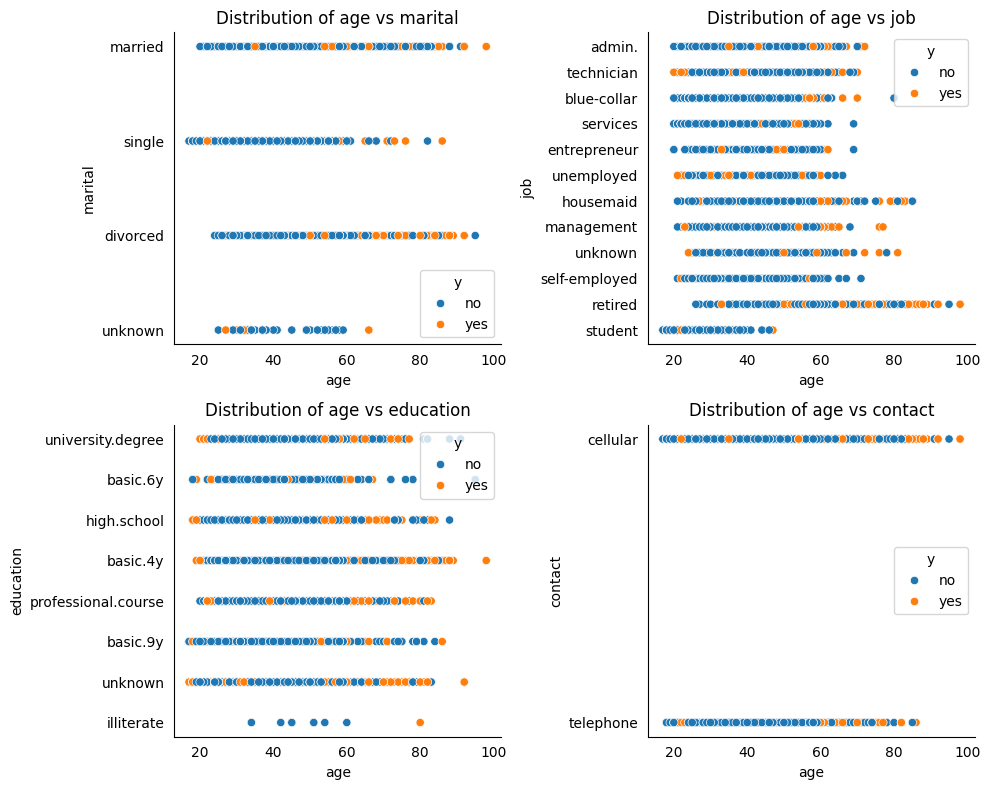

In [63]:
from itertools import combinations
obj_cols.remove('y')
num_col_combinations = [combination for combination in combinations(num_cols, 2)]
age_col_combinations = [('age', col) for col in obj_cols]
age_col_combinations
get_bivariate_distribution_plot(transformed_df, column_names=num_col_combinations, hue='y', plot_type="scatter")
get_bivariate_distribution_plot(df=df_train, column_names=age_col_combinations, hue='y', plot_type="count")

In [64]:
df_train[['pdays', 'y']].groupby('y').value_counts().unstack(fill_value=0).T

y,no,yes
pdays,,
0,2,7
1,13,6
2,14,22
3,98,210
4,34,42
5,11,19
6,87,208
7,12,23
8,5,9


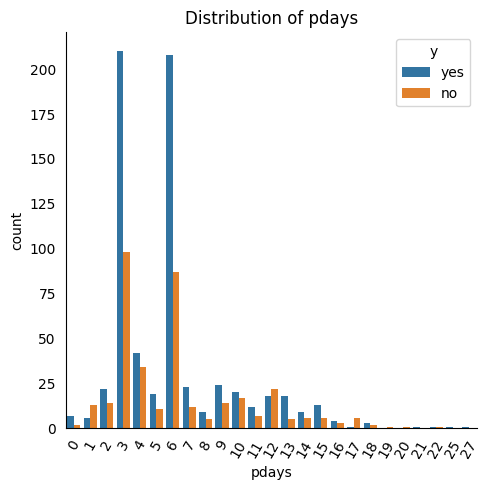

In [65]:
get_univariate_distribution_plot(df_train.query('pdays != 999'), ["pdays"], hue='y', plot_type="count", ticks_rotation=60)

In [66]:
bin_edges = np.linspace(-1, 27, 5, dtype=np.int64)
bin_edges = np.append(bin_edges, [float('inf')])
bin_edges

array([-1.,  6., 13., 20., 27., inf])

In [67]:
df_pdays = pd.cut(df_train['pdays'], bins=bin_edges, labels=["days", "weeks", 'fifteen-days', 'month', 'never'], include_lowest=True)
df_pdays = pd.DataFrame(df_pdays)
df_pdays['y'] = df_train['y'].values
df_pdays['pdays'].value_counts()

,count
pdays,
never,27792
days,773
weeks,206
fifteen-days,55
month,5


In [68]:
pdays_woe = calculate_woe(df_pdays, 'pdays', 'y')
pdays_woe

{'never': np.float64(-0.21710985278837486),
 'days': np.float64(2.748243358584556),
 'weeks': np.float64(2.476410473169712),
 'fifteen-days': np.float64(2.245169711622883),
 'month': np.float64(3.449142515948819)}

In [69]:
woe_df_x = WOEEncoder(event='yes')
woe_df_x.fit_transform(df_pdays['pdays'], df_pdays['y'])

array([[ 0.21710985],
       [ 0.21710985],
       [ 0.21710985],
       ...,
       [-2.74824335],
       [ 0.21710985],
       [ 0.21710985]])

In [70]:
print(df_train[df_train['duration']>1500]['y'].value_counts())
print(df_train[df_train['duration']<60]['y'].value_counts())
print(df_train[df_train['campaign']>15]['y'].value_counts())
print(df_train[df_train['age']>80]['y'].value_counts())

y
yes    85
no     58
Name: count, dtype: int64
y
no     2915
yes       1
Name: count, dtype: int64
y
no     246
yes      2
Name: count, dtype: int64
y
no     43
yes    39
Name: count, dtype: int64


In [71]:
df_train[['previous', 'y']].groupby('y').value_counts().unstack(fill_value=0).T

y,no,yes
previous,,
0,22691,2216
1,2511,663
2,287,244
3,65,92
4,20,26
5,4,8
6,1,2
7,1,0


In [75]:
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import OrdinalEncoder
# contineous_cols_score
# categorical cols_score
# continuos columns to bins
p_values = {}


df_trial = df_train.copy()
df_trial['y'] = df_trial['y'].map({"no":0, "yes":1})

targetEncoder = TargetEncoder(smooth=1)
woeEncoder = WOEEncoder(event=1, )
ordinalEncoder = OrdinalEncoder()
categorizer = Categorizer()

_, num_cols, obj_cols, cat_cols = get_numeric_or_categorical_columns(df_trial)

num_cols.remove('y')


# categories to target encoding values and woe encoded values
for col in obj_cols:
    df_trial[f"t_{col}"] = targetEncoder.fit_transform(df_trial[[col]], df_trial['y'])
    df_trial[f"w_{col}"] = woeEncoder.fit_transform(df_trial[col], df_trial['y'])



for col in num_cols:
    df_trial[f"b_{col}"] = categorizer.fit_transform(df_trial[[col]])

_, num_cols, obj_cols, cat_cols = get_numeric_or_categorical_columns(df_trial)

df_trial[obj_cols] = ordinalEncoder.fit_transform(df_trial[obj_cols])

for col in obj_cols:
    chi2_score, p_value = chi2(df_trial[[col]], df_trial['y'])
    p_values[col] = p_value[0]

for col in num_cols:
    f_score, p_value = f_classif(df_trial[[col]], df_trial['y'], )
    p_values[col] = p_value[0]
df_trial.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,b_age,b_duration,b_campaign,b_pdays,b_previous,b_emp.var.rate,b_cons.price.idx,b_cons.conf.idx,b_euribor3m,b_nr.employed
0,29,0.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0
1,29,9.0,2.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,2.0
2,45,1.0,1.0,1.0,1.0,2.0,0.0,1.0,6.0,2.0,...,1.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,4.0,3.0
3,34,7.0,1.0,6.0,0.0,0.0,0.0,0.0,6.0,2.0,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,2.0
4,32,0.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,4.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,2.0


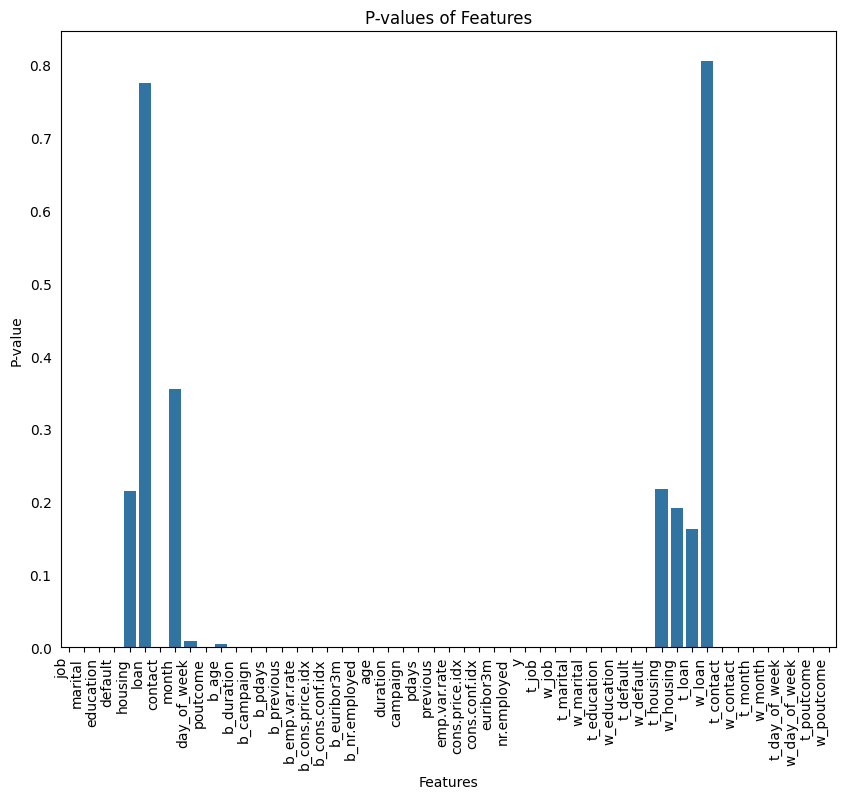

In [76]:
p_values_df = pd.DataFrame(p_values.values(), index=p_values.keys(), columns=['p-value'] )
# Set the figure size using plt.figure
plt.figure(figsize=(10, 8))
fig = sns.barplot(x=p_values_df.index, y=p_values_df['p-value'], data=p_values_df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=60, ha="right")
fig.yaxis.set_ticks_position('none')
fig.tick_params(axis='x', rotation=90)
plt.xlabel('Features')
plt.ylabel('P-value')
plt.title('P-values of Features')
plt.show()

In [77]:
df_trial = df_train.select_dtypes(np.number).copy()
df_trial['correlatedColumns1'] = df_trial['emp.var.rate']/(df_trial['nr.employed'] * df_trial['euribor3m']+1e-5)
df_trial['y'] = df_train['y'].map({"no":0, "yes":1})

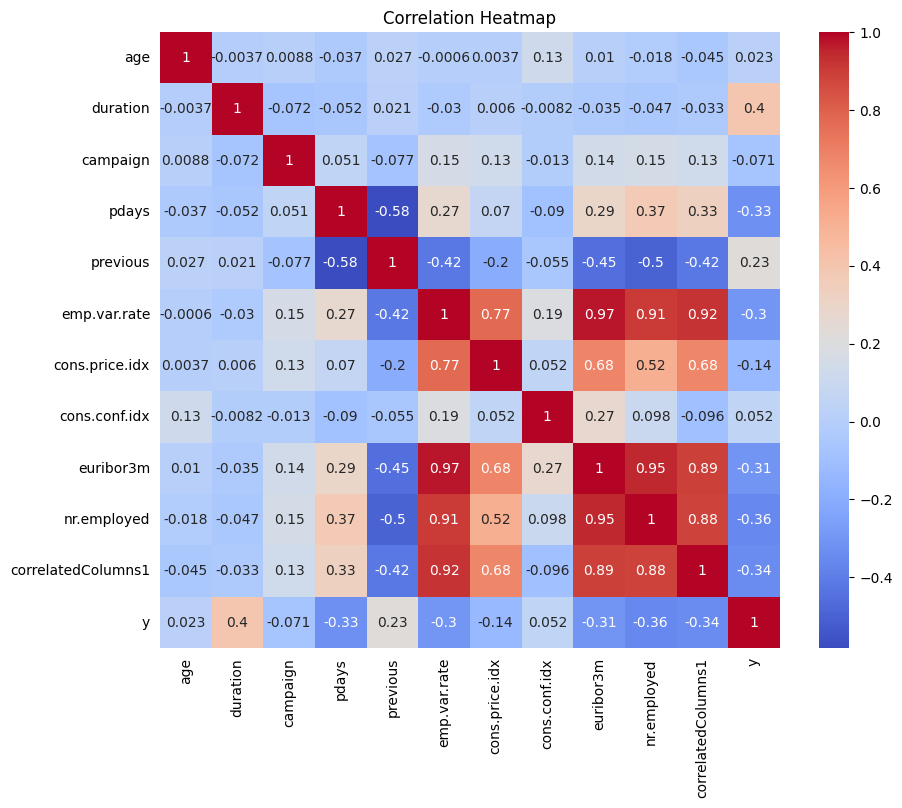

In [78]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_trial.corr(numeric_only=True), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.show()

## evaluation

In [79]:
print("columns: ", df_train.columns.to_list())
print("numeric_cols: ", numeric_cols)
print("categorical_cols: ", categorical_cols)
print("object_cols: ", object_cols)

columns:  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
numeric_cols:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_cols:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'emp.var.rate', 'y']
object_cols:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


 Cross validation determination of parameters

 - we will keep **ages**, as it is completely possible to have 80-100 year old client. So they could not be consider as outliers. So we can't afford data loss in this case, on age we will apply *robust scaling* as there some ages with very high values
 - For **duration** which has duration greater than 1500 has very less people, so we can drop them or we need to perform *robust scaling* over them.
 - There is no point to delete outlier durations as durations also possible to be higher than 1500 seconds so we may loose data. rather we will transform duration
 - **duration** will be converted to minutes or log scale but log scale will be better, but *we will try with and without conversion to log scale. We will scale durations*.

 - **Campaign** has maximum probability density in region of 0-15 after that we have very few data point. So rather using these all vast values *we will winsorized campaign*. Try with 95-100% winsorization. But still *we will try to handle these extreme values with regularization also*.
 - **pdays** has very wierd distribution, as it has many values 999 to represent customer has not been contacted before in this campaign.and other values are from 0 to 30. so 999 could create imbalance in wights, so rather using pdays as values we will try with conversion to bins. so it could become categories like customer was contacted before a day, a week or before fifteen days or before nearly a month or never contacted(case 30-999). After conversion to bins we will apply *target encoding* or *WOE encoding*

 - **previous** has only 8 values from 0-8 and it states how many previous calls has been done to customer in same campaign. We will keep it as it is, no conversion needed. Still we will try with robust scaling

 - **emp.var.rate** need to be robust scaled as its data is skewed or lets check with cutting it into categories
 - **cons.price.idx**: need to be scaled, any scale will be fine, so, for many we are using robust scaling so robust scale
 - **cons.conf.idx** to scale
 - **euribor3m** to scale
 - **nr.employed** to scale

 - **job** - Target Encoding
 - **day_of_week** and **month** shold be add up together, so we would have to add them togethe and we will apply target encoding over it
 -  **default**, **housing**, **loan** have only few categories and they could be woe encoded
 - **contact** will be label encoded,
 - **poutcome** will be target encoded and woeencoded
 -

## Transform and train

### train

In [80]:
df_original = df_train.copy()

In [81]:
# shuffle all dataset rows
df_train = df_train.sample(frac=1, random_state=34).reset_index(drop=True)
print(df_train.shape)
df_train.head()

(28831, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,26,services,divorced,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,46,admin.,married,high.school,no,yes,yes,cellular,jul,tue,...,1,13,2,success,-1.7,94.215,-40.3,0.797,4991.6,yes
2,50,self-employed,married,professional.course,no,yes,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
3,48,technician,married,professional.course,no,no,no,cellular,jul,tue,...,1,999,1,failure,-1.7,94.215,-40.3,0.876,4991.6,no
4,34,admin.,married,university.degree,no,yes,yes,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes


In [82]:
df_train['y'].value_counts()

,count
y,
no,25580
yes,3251


In [83]:
df_X = df_train.drop(columns=['y'])
df_y = df_train['y'].map({"no":0, "yes":1})

In [84]:
df_X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,services,divorced,professional.course,no,no,no,telephone,may,mon,241,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,46,admin.,married,high.school,no,yes,yes,cellular,jul,tue,396,1,13,2,success,-1.7,94.215,-40.3,0.797,4991.6
2,50,self-employed,married,professional.course,no,yes,no,cellular,jul,thu,77,2,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
3,48,technician,married,professional.course,no,no,no,cellular,jul,tue,288,1,999,1,failure,-1.7,94.215,-40.3,0.876,4991.6
4,34,admin.,married,university.degree,no,yes,yes,cellular,apr,thu,177,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1


In [85]:
df_X['emp.var.to.employed'] = df_X['emp.var.rate']/(df_X['nr.employed'] * df_X['euribor3m']+1e-5)
df_X.drop(columns=['emp.var.rate', 'nr.employed', 'euribor3m'], inplace=True)

In [86]:
categorizer = Categorizer(bins=[[-1, 3, 6, 15, 27, np.inf]], labels=[['days', 'weeks', 'fifteen-days', 'month', 'never']])
df_X[['pdays']] = categorizer.fit_transform(df_X[['pdays']])
df_X.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,emp.var.to.employed
28826,30,admin.,single,university.degree,no,no,no,cellular,jul,thu,252,1,weeks,2,success,94.215,-40.3,-0.000403
28827,33,admin.,married,university.degree,no,yes,no,cellular,jun,mon,346,1,never,0,nonexistent,92.963,-40.8,-0.000451
28828,47,management,married,basic.4y,unknown,yes,no,cellular,nov,wed,117,1,never,0,nonexistent,93.200,-42.0,-0.000005
28829,39,management,single,high.school,unknown,no,no,telephone,nov,tue,274,1,never,0,nonexistent,93.200,-42.0,-0.000005
28830,39,technician,married,university.degree,no,no,yes,cellular,jun,tue,434,2,never,1,failure,94.055,-39.8,-0.000485


In [88]:
all_columns, numeric_cols, object_cols, categorical = get_numeric_or_categorical_columns(df_X)
print(all_columns)
print(numeric_cols)
print(object_cols)
print(categorical)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'emp.var.to.employed']
['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'emp.var.to.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome']


In [89]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
processor_linear = Preprocessor(
    process_and_columns={
        "target_encode_columns": ['job', 'marital', 'education', 'poutcome', 'month', 'day_of_week'],
        "woe_encode_columns":  ['default', 'housing', 'loan', 'contact', 'pdays'],
        "powerTransformer_columns": ['duration']
    },
    remainder='passthrough', target_event=1
)

processor_trees = Preprocessor(
    process_and_columns={"label_encode_columns": object_cols},
    remainder='passthrough', target_event=1
)

In [90]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from copy import deepcopy
processor_logistic = deepcopy(processor_linear)
processor_svm = deepcopy(processor_linear)
processor_random_forest = deepcopy(processor_trees)

logistic_pipeline = make_pipeline(
    processor_logistic,
    SelectKBest(f_classif, k=10),
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1, 1:5})
)
svm_pipeline = make_pipeline(
    processor_svm,
    SelectKBest(f_classif, k=10),
    StandardScaler(),
    SVC(random_state=42, probability=True, class_weight={0: 1, 1:5})
)
random_forest_pipeline = make_pipeline(
    processor_random_forest,
    SelectKBest(f_classif, k=10),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200, random_state=42, min_samples_split=20, class_weight={0:1, 1:5} )
)

del processor_logistic, processor_svm, processor_random_forest

In [91]:
logistic_pipeline.fit(df_X, df_y)
svm_pipeline.fit(df_X, df_y)
random_forest_pipeline.fit(df_X, df_y)

Pipeline(steps=[('preprocessor',
                 Preprocessor(process_and_columns={'label_encode_columns': ['job',
                                                                            'marital',
                                                                            'education',
                                                                            'default',
                                                                            'housing',
                                                                            'loan',
                                                                            'contact',
                                                                            'month',
                                                                            'day_of_week',
                                                                            'pdays',
                                                                            'poutcome']},
                              remainder='passthrough', target_event=(1,))),
                ('selectkbest', SelectKBest()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 5},
                                        min_samples_split=20, n_estimators=200,
                                        random_state=42))])

### Finding Threshold

### transform and predict

In [92]:
df_val_X = df_val.drop(columns=['y'])
df_val_y = df_val['y'].map({"no":0, "yes":1})

In [93]:
df_val_X[['pdays']] = categorizer.transform(df_val_X[['pdays']])
df_val_X['pdays'].value_counts()

,count
pdays,
never,3959
days,61
weeks,60
fifteen-days,32
month,7


In [94]:
df_val_X['emp.var.to.employed'] = df_val_X['emp.var.rate']/(df_val_X['nr.employed'] * df_val_X['euribor3m']+1e-5)
df_val_X.drop(columns=['emp.var.rate', 'nr.employed', 'euribor3m'], inplace=True)

In [95]:
y_pred_val_logistic_proba = logistic_pipeline.predict_proba(df_val_X)[:, 1]
y_pred_val_svm_proba = svm_pipeline.predict_proba(df_val_X)[:, 1]
y_pred_val_rf_proba = random_forest_pipeline.predict_proba(df_val_X)[:, 1]
np.column_stack((y_pred_val_logistic_proba[:5], y_pred_val_svm_proba[:5], y_pred_val_rf_proba[:5]))

array([[0.62632559, 0.23110033, 0.39910822],
       [0.14035488, 0.01002154, 0.        ],
       [0.08331157, 0.00465553, 0.        ],
       [0.00069993, 0.0035806 , 0.00255102],
       [0.0092198 , 0.00070679, 0.        ]])

### find threshold

In [96]:
np.unique(y_pred_val_logistic_proba)

array([1.10447436e-05, 2.99135296e-05, 7.43237372e-05, ...,
       9.99509516e-01, 9.99672436e-01, 9.99742156e-01])

In [97]:
from sklearn.metrics import roc_curve, auc
# plot roc for svm and logisitc regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(df_val_y.values, y_pred_val_logistic_proba)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(df_val_y.values, y_pred_val_svm_proba)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(df_val_y.values, y_pred_val_rf_proba)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
best_threshold_logistic = thresholds_logistic[np.argmax(tpr_logistic - fpr_logistic)]
best_threshold_svm = thresholds_svm[np.argmax(tpr_svm - fpr_svm)]
best_threshold_rf = thresholds_rf[np.argmax(tpr_rf - fpr_rf)]
best_threshold_logistic, best_threshold_rf, best_threshold_svm

(np.float64(0.379162512240246),
 np.float64(0.44028374588412594),
 np.float64(0.13873636387225635))

In [98]:
loc_theshold_logistic = np.array([tpr_logistic[thresholds_logistic==best_threshold_logistic][0], fpr_logistic[thresholds_logistic==best_threshold_logistic][0]])
loc_theshold_svm = np.array([tpr_svm[thresholds_svm==(best_threshold_svm)][0], fpr_svm[thresholds_svm==best_threshold_svm][0]])
loc_theshold_rf = np.array([tpr_rf[thresholds_rf==best_threshold_rf][0], fpr_rf[thresholds_rf==best_threshold_rf][0]])
threshold_locations = np.array([loc_theshold_logistic, loc_theshold_svm, loc_theshold_rf])

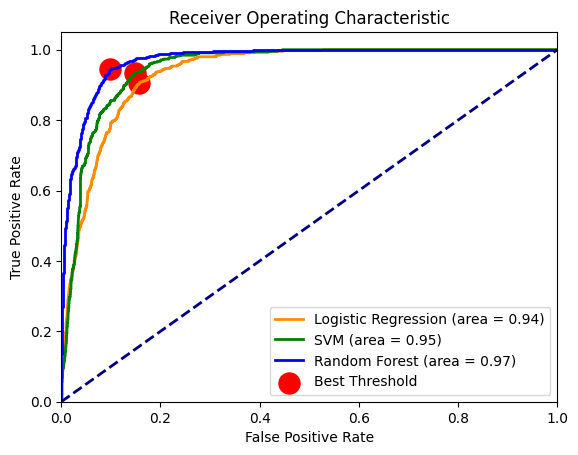

In [99]:
# plot roc curve
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.scatter(threshold_locations[:, 1], threshold_locations[:, 0], color='red', lw=2, label='Best Threshold', s=200)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [100]:
def tp_prediction_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return np.round([(tp - fn + 1e-10) / (tp + fp)], 4)[0]

def tn_prediction_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(tn, fn, fp)
    return np.round([(tn - fp  + 1e-10) / (tn + fn)], 4)[0]
def classification_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return (precision*0.75)+recall

In [101]:
def get_best_threshold(y_true, probabilities, current_threshold, max_shift=0.2):
    threshold_shifts = np.linspace(-max_shift, max_shift, 100)
    best_threshold = current_threshold
    for shift in threshold_shifts:
        y_preds = np.where(probabilities > best_threshold, 1, 0)
        prev_best_score = classification_score(y_true, y_preds)
        shifted_threshold = best_threshold + shift
        y_preds = np.where(probabilities > shifted_threshold, 1, 0)
        current_best_score = classification_score(y_true, y_preds)
        if current_best_score > prev_best_score:
            best_threshold = shifted_threshold
    return best_threshold

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

best_threshold = best_threshold_logistic

best_threshold_logistic = get_best_threshold(df_val_y.values, y_pred_val_logistic_proba, best_threshold)


print(f"\nBest threshold considering FN rate: {best_threshold_logistic}")

# Use the best_threshold for predictions
y_pred_val_logistic = np.where(y_pred_val_logistic_proba > best_threshold_logistic, 1, 0)
print(classification_report(df_val_y.values, y_pred_val_logistic))
print(confusion_matrix(df_val_y.values, y_pred_val_logistic))



Best threshold considering FN rate: 0.3731019061796399
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3668
           1       0.41      0.91      0.57       451

    accuracy                           0.85      4119
   macro avg       0.70      0.87      0.74      4119
weighted avg       0.92      0.85      0.87      4119

[[3080  588]
 [  41  410]]


In [103]:
# Shift the threshold slightly and evaluate the performance
threshold_shifts = np.linspace(-0.1, 0.1, 50)  # Example shifts: -0.05 to 0.05 in steps of 0.01

best_threshold = best_threshold_svm

best_threshold_svm = get_best_threshold(df_val_y.values, y_pred_val_svm_proba, best_threshold)

print(f"\nBest threshold considering FN rate: {best_threshold_svm}")

# Use the best_threshold for predictions
y_pred_val_svm = np.where(y_pred_val_svm_proba > best_threshold, 1, 0)
print(classification_report(df_val_y.values, y_pred_val_svm))
print(confusion_matrix(df_val_y.values, y_pred_val_svm))



Best threshold considering FN rate: 0.13873636387225632
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3668
           1       0.44      0.93      0.59       451

    accuracy                           0.86      4119
   macro avg       0.71      0.89      0.76      4119
weighted avg       0.93      0.86      0.88      4119

[[3126  542]
 [  31  420]]


In [104]:
# Shift the threshold slightly and evaluate the performance
threshold_shifts = np.linspace(-0.1, 0.1, 50)  # Example shifts: -0.05 to 0.05 in steps of 0.01

best_f1_score = -1
best_threshold = best_threshold_rf

best_threshold_rf = get_best_threshold(df_val_y.values, y_pred_val_rf_proba, best_threshold)

# for shift in threshold_shifts:
#     shifted_threshold = best_threshold + shift
#     y_pred_val_rf = np.where(y_pred_val_rf_proba > shifted_threshold, 1, 0)

#     tn, fp, fn, tp = confusion_matrix(df_val_y.values, y_pred_val_rf).ravel()

#     # Prioritize minimizing false negatives
#     fn_rate = fn / (fn+tp)
#     fp_rate = fp / (fp+tn)

#     f1 = (tp-fn) / (tp + 0.5*(fp+fn)) if (tp+fp+fn) > 0 else 0

#     if fn_rate < 0.2 and f1 > best_f1_score:  # Example constraint for FN rate
#       best_f1_score = f1
#       best_threshold_rf = shifted_threshold

print(f"\nBest threshold considering FN rate: {best_threshold_rf}")

# Use the best_threshold for predictions
y_pred_val_rf = np.where(y_pred_val_rf_proba > best_threshold_rf, 1, 0)
print(classification_report(df_val_y.values, y_pred_val_rf))
print(confusion_matrix(df_val_y.values, y_pred_val_rf))



Best threshold considering FN rate: 0.44634435194473193
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      3668
           1       0.54      0.94      0.69       451

    accuracy                           0.91      4119
   macro avg       0.77      0.92      0.82      4119
weighted avg       0.94      0.91      0.92      4119

[[3312  356]
 [  26  425]]


### checking error on training data

In [105]:
y_pred_train_logistic_proba = logistic_pipeline.predict_proba(df_X)[:, 1]
y_pred_train_svm_proba = svm_pipeline.predict_proba(df_X)[:, 1]
y_pred_train_rf_proba = random_forest_pipeline.predict_proba(df_X)[:, 1]
np.column_stack((y_pred_train_logistic_proba[:5], y_pred_train_svm_proba[:5], y_pred_train_rf_proba[:5]))

array([[6.63532098e-02, 2.67802511e-03, 0.00000000e+00],
       [9.51734289e-01, 6.10484220e-01, 9.71704054e-01],
       [1.46163199e-02, 1.48421054e-04, 1.58770161e-03],
       [6.03594655e-01, 5.45223754e-01, 8.47593614e-01],
       [2.87927130e-01, 3.76603600e-01, 5.48752705e-01]])

In [106]:
y_pred_train_logistic = np.where(y_pred_train_logistic_proba > best_threshold_logistic, 1, 0)
y_pred_train_svm = np.where(y_pred_train_svm_proba > best_threshold_svm+0.07, 1, 0)
y_pred_train_rf = np.where(y_pred_train_rf_proba > best_threshold_rf, 1, 0)

In [107]:
print(classification_report(df_y.values, y_pred_train_logistic))
print(confusion_matrix(df_y.values, y_pred_train_logistic))
print(tp_prediction_rate(df_y.values, y_pred_train_logistic))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     25580
           1       0.42      0.89      0.57      3251

    accuracy                           0.85     28831
   macro avg       0.70      0.87      0.74     28831
weighted avg       0.92      0.85      0.87     28831

[[21570  4010]
 [  350  2901]]
0.3691


In [108]:
print(classification_report(df_y.values, y_pred_train_svm))
print(confusion_matrix(df_y.values, y_pred_train_svm))
print(tp_prediction_rate(df_y.values, y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     25580
           1       0.49      0.88      0.63      3251

    accuracy                           0.88     28831
   macro avg       0.74      0.88      0.78     28831
weighted avg       0.93      0.88      0.90     28831

[[22583  2997]
 [  388  2863]]
0.4224


In [109]:
print(classification_report(df_y.values, y_pred_train_rf))
print(confusion_matrix(df_y.values, y_pred_train_rf))
print(tp_prediction_rate(df_y.values, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     25580
           1       0.57      0.96      0.72      3251

    accuracy                           0.91     28831
   macro avg       0.78      0.94      0.83     28831
weighted avg       0.95      0.91      0.92     28831

[[23240  2340]
 [  123  3128]]
0.5496


### Inspect

In [110]:
from sklearn.inspection import permutation_importance

result_logistic = permutation_importance(logistic_pipeline, df_val_X, df_val_y, n_repeats=10, random_state=42, n_jobs=2)
result_svm = permutation_importance(svm_pipeline, df_val_X, df_val_y, n_repeats=10, random_state=42, n_jobs=2)
result_rf = permutation_importance(random_forest_pipeline, df_val_X, df_val_y, n_repeats=10, random_state=42, n_jobs=2)

In [111]:
feature_names = df_X.columns.to_list()
print(feature_names)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'emp.var.to.employed']


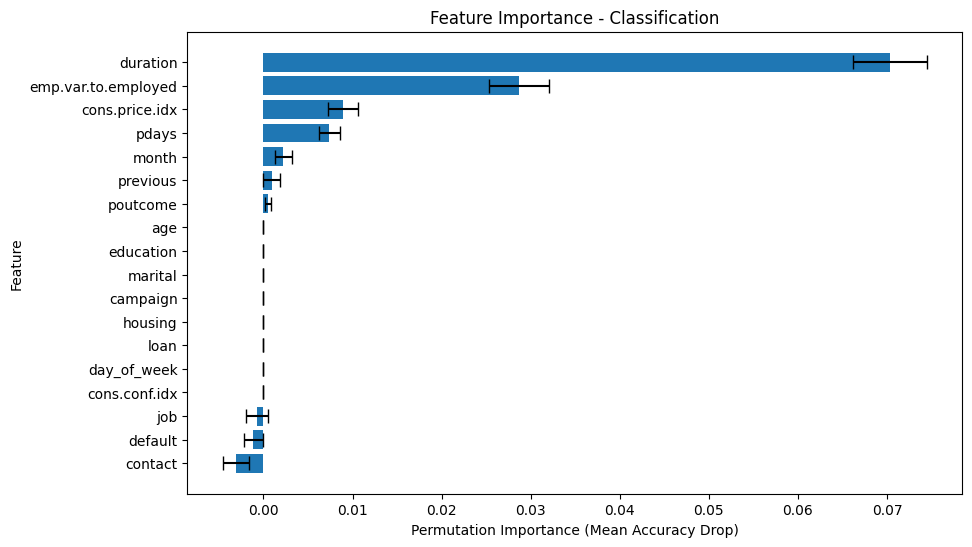

In [112]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame(
    {
        "Feature": feature_names,
        "Mean Importance": result_logistic.importances_mean,
        "Std Dev": result_logistic.importances_std
    }
).sort_values(by="Mean Importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Mean Importance"], xerr=importance_df["Std Dev"], capsize=5)
plt.xlabel("Permutation Importance (Mean Accuracy Drop)")
plt.ylabel("Feature")
plt.title("Feature Importance - Classification")
plt.gca().invert_yaxis()
plt.show()

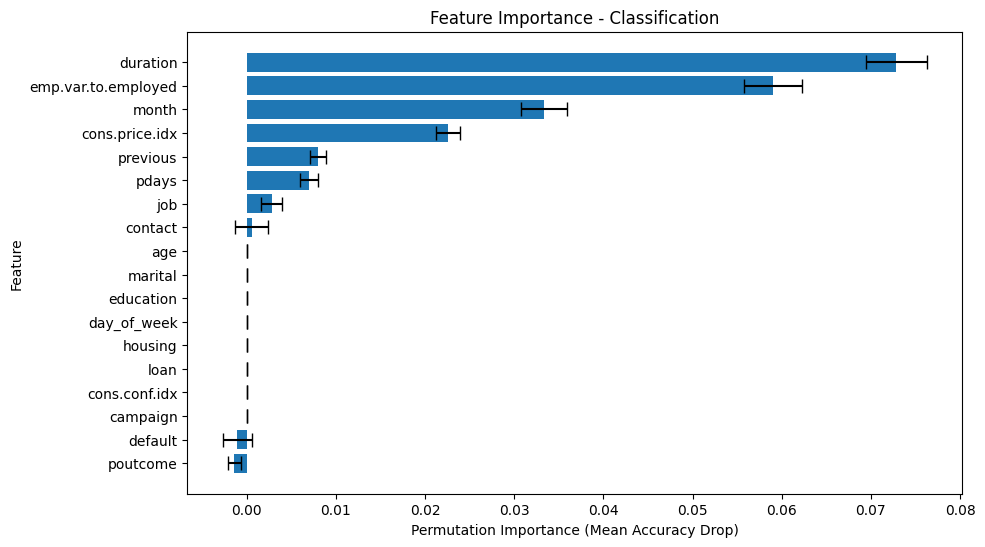

In [113]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame(
    {
        "Feature": feature_names,
        "Mean Importance": result_svm.importances_mean,
        "Std Dev": result_svm.importances_std
    }
).sort_values(by="Mean Importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Mean Importance"], xerr=importance_df["Std Dev"], capsize=5)
plt.xlabel("Permutation Importance (Mean Accuracy Drop)")
plt.ylabel("Feature")
plt.title("Feature Importance - Classification")
plt.gca().invert_yaxis()
plt.show()

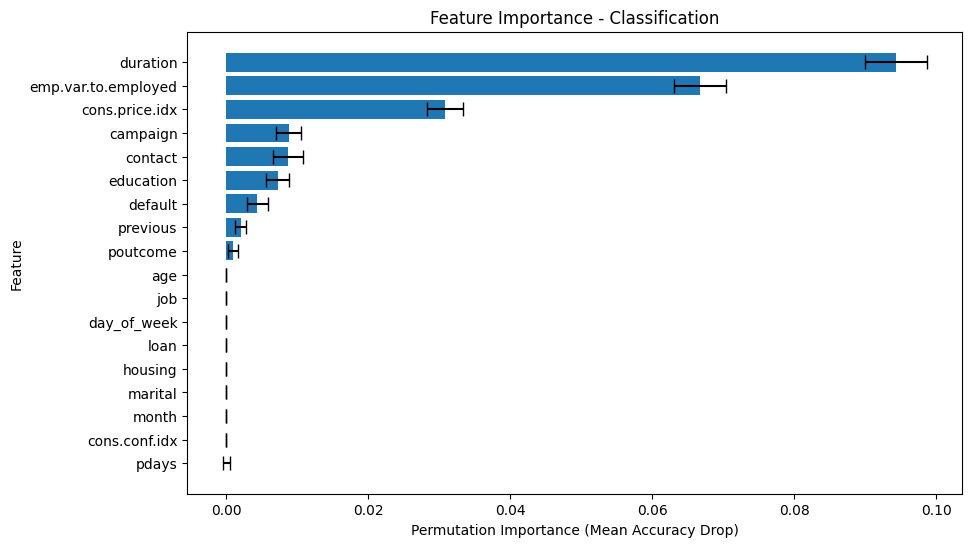

In [114]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame(
    {
        "Feature": feature_names,
        "Mean Importance": result_rf.importances_mean,
        "Std Dev": result_rf.importances_std
    }
).sort_values(by="Mean Importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Mean Importance"], xerr=importance_df["Std Dev"], capsize=5)
plt.xlabel("Permutation Importance (Mean Accuracy Drop)")
plt.ylabel("Feature")
plt.title("Feature Importance - Classification")
plt.gca().invert_yaxis()
plt.show()

### Testing different matrics over test data

In [122]:
df_test_X = df_test.drop(columns=['y'])
df_test_y = df_test['y'].map({"no":0, "yes":1})

In [123]:
df_test_X[['pdays']] = categorizer.transform(df_test_X[['pdays']])
df_test_X['pdays'].value_counts()

,count
pdays,
never,11881
weeks,175
days,169
fifteen-days,120
month,12


In [124]:
df_test_X['emp.var.to.employed'] = df_test_X['emp.var.rate']/(df_test_X['nr.employed'] * df_test_X['euribor3m']+1e-5)
df_test_X.drop(columns=['emp.var.rate', 'nr.employed', 'euribor3m'], inplace=True)

In [125]:
y_pred_test_logistic_proba = logistic_pipeline.predict_proba(df_test_X)[:, 1]
y_pred_test_svm_proba = svm_pipeline.predict_proba(df_test_X)[:, 1]
y_pred_test_rf_proba = random_forest_pipeline.predict_proba(df_test_X)[:, 1]
np.column_stack((y_pred_test_logistic_proba[:5], y_pred_test_svm_proba[:5], y_pred_test_rf_proba[:5]))

array([[0.43319641, 0.11327174, 0.07188189],
       [0.06255444, 0.00301944, 0.00882369],
       [0.01054559, 0.00223467, 0.        ],
       [0.23099676, 0.02205453, 0.01235374],
       [0.0831833 , 0.0012458 , 0.00497368]])

In [126]:
y_pred_test_logistic = np.where(y_pred_test_logistic_proba > best_threshold_logistic, 1, 0)
print(classification_report(df_test_y.values, y_pred_test_logistic))
print(confusion_matrix(df_test_y.values, y_pred_test_logistic))
print(tp_prediction_rate(df_test_y.values, y_pred_test_logistic))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10968
           1       0.42      0.91      0.57      1389

    accuracy                           0.85     12357
   macro avg       0.70      0.88      0.74     12357
weighted avg       0.92      0.85      0.87     12357

[[9219 1749]
 [ 123 1266]]
0.3791


In [127]:
y_pred_test_svm = np.where(y_pred_test_svm_proba > best_threshold_svm, 1, 0)
print(classification_report(df_test_y.values, y_pred_test_svm))
print(confusion_matrix(df_test_y.values, y_pred_test_svm))
print(tp_prediction_rate(df_test_y.values, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     10968
           1       0.44      0.92      0.59      1389

    accuracy                           0.86     12357
   macro avg       0.71      0.88      0.75     12357
weighted avg       0.93      0.86      0.88     12357

[[9325 1643]
 [ 117 1272]]
0.3962


In [128]:
y_pred_test_rf = np.where(y_pred_test_rf_proba > best_threshold_rf, 1, 0)
print(classification_report(df_test_y.values, y_pred_test_rf))
print(confusion_matrix(df_test_y.values, y_pred_test_rf))
print(tp_prediction_rate(df_test_y.values, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10968
           1       0.50      0.86      0.63      1389

    accuracy                           0.89     12357
   macro avg       0.74      0.88      0.78     12357
weighted avg       0.93      0.89      0.90     12357

[[9771 1197]
 [ 192 1197]]
0.4198


## conclusion

1. Here we have acheived

## other trials

In [ ]:
bin_edges = np.linspace(-1, 27, 5, dtype=np.int64)
bin_edges = np.append(bin_edges, [float('inf')])
labels=["days", "weeks", 'fifteen-days', 'month', 'never']
df_X['pdays'] = pd.cut(df_train['pdays'], bins=bin_edges, labels=labels, include_lowest=True)

In [ ]:
df_X['related_indexes'] = df_X['emp.var.rate'] * df_X['euribor3m']
df_X = df_X.drop(columns=[ 'emp.var.rate', 'euribor3m'])

In [ ]:
df_X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,related_indexes
0,86,retired,single,basic.9y,unknown,no,no,telephone,jun,wed,955,1,never,0,nonexistent,94.055,-39.8,4991.6,-1.3039
1,46,admin.,married,university.degree,no,yes,no,telephone,may,mon,243,4,never,0,nonexistent,92.893,-46.2,5099.1,-2.2752
2,32,admin.,married,high.school,no,yes,no,telephone,may,mon,396,3,never,0,nonexistent,93.994,-36.4,5191.0,5.3427
3,26,student,single,high.school,no,no,no,telephone,jun,wed,219,1,never,0,nonexistent,94.465,-41.8,5228.1,6.8096
4,31,blue-collar,married,basic.9y,no,yes,no,cellular,may,mon,475,1,never,1,failure,92.893,-46.2,5099.1,-2.3382


In [ ]:
robust_scale_transformations = ['age', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'related_indexes']
log_transformations = ['duration']
winsorized_transformations = ['campaign']
target_encoding_transformations = ['job', 'marital', 'education', 'pdays']
woe_encoding_transformations = ['default', 'housing', 'loan', 'contact', 'poutcome']
label_encoding_transformations = ['month', 'day_of_week']

In [ ]:
col_list = [*robust_scale_transformations, *log_transformations, *winsorized_transformations, *target_encoding_transformations, *woe_encoding_transformations, *label_encoding_transformations]
col_list.sort()
print(col_list)
df_col_list = df_X.columns.to_list()
df_col_list.sort()
print(df_col_list)

['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact', 'day_of_week', 'default', 'duration', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'nr.employed', 'pdays', 'poutcome', 'previous', 'related_indexes']
['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact', 'day_of_week', 'default', 'duration', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'nr.employed', 'pdays', 'poutcome', 'previous', 'related_indexes']


In [ ]:
preprocessor1 = Preprocessor(
    process_and_columns={
        "target_encode_columns": target_encoding_transformations,
        "woe_encode_columns":  woe_encoding_transformations,
        "winsorizer_robustScaler_columns": winsorized_transformations,
        "powerTransformer_columns": log_transformations,
        "robustScaler_columns": robust_scale_transformations,
        "label_encode_columns": label_encoding_transformations,
    },
    remainder='passthrough', target_event=1,
    # winsorizor_logScaler_pipe=winsorizor_logScaler_pipe,
    winsorizer_robustScaler_pipe=winsorizer_robustScaler_pipe,
    # targetEncode_robustScaler_pipe=targetEncode_robustScaler_pipe
)

In [ ]:
numeric_cols, object_cols, categorical = get_numeric_or_categorical_columns(df_X)
print(numeric_cols)
print(object_cols)
print(categorical)
print(numeric_cols.remove('duration'))
print(numeric_cols)

['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'related_indexes']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome']
None
['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'related_indexes']


In [ ]:
preprocessor2 = Preprocessor(
    process_and_columns={
        "woe_encode_columns": object_cols,
        "powerTransformer_columns": log_transformations,
        "robustScaler_columns": numeric_cols
    },remainder='passthrough', target_event=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipeline1 = make_pipeline(
    preprocessor2,
    # LogisticRegression(random_state=42, max_iter=1000)
    RandomForestClassifier(n_estimators=200, random_state=42, min_samples_split=30 )

)

In [ ]:
pipeline1.fit(df_X, df_y)

<ipython-input-17-0012222ea5f8>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('feature')['target'].agg(


Pipeline(steps=[('preprocessor',
                 Preprocessor(process_and_columns={'powerTransformer_columns': ['duration'],
                                                   'robustScaler_columns': ['age',
                                                                            'campaign',
                                                                            'previous',
                                                                            'cons.price.idx',
                                                                            'cons.conf.idx',
                                                                            'nr.employed',
                                                                            'related_indexes'],
                                                   'woe_encode_columns': ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'pdays',
                                                                          'poutcome']},
                              remainder='passthrough', target_event=(1,))),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=30, n_estimators=200,
                                        random_state=42))])

## making validation dataset model ready

In [ ]:
df_val_X = df_test.drop(columns=['y'])
df_val_y = df_test['y'].map({"no":0, "yes":1})
df_val_X['pdays'] = pd.cut(df_val_X['pdays'], bins=bin_edges, labels=labels, include_lowest=True)
df_val_X['related_indexes'] = df_val_X['emp.var.rate'] * df_val_X['euribor3m']
df_val_X = df_val_X.drop(columns=[ 'emp.var.rate', 'euribor3m'])
df_val_X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,related_indexes
0,57,technician,married,high.school,no,no,yes,cellular,may,mon,371,1,never,1,failure,92.893,-46.2,5099.1,-2.3382
1,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,285,2,never,0,nonexistent,93.994,-36.4,5191.0,5.3460
2,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,52,1,never,1,failure,92.893,-46.2,5099.1,-2.3634
3,36,admin.,married,high.school,no,no,no,telephone,jun,fri,355,4,never,0,nonexistent,94.465,-41.8,5228.1,6.9538
4,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,189,2,never,0,nonexistent,93.918,-42.7,5228.1,6.9482


In [ ]:
col_list = [*robust_scale_transformations, *log_transformations, *winsorized_transformations, *target_encoding_transformations, *woe_encoding_transformations, *label_encoding_transformations]
col_list.sort()
print(col_list)
df_col_list = df_val_X.columns.to_list()
df_col_list.sort()
print(df_col_list)

['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact', 'day_of_week', 'default', 'duration', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'nr.employed', 'pdays', 'poutcome', 'previous', 'related_indexes']
['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact', 'day_of_week', 'default', 'duration', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'nr.employed', 'pdays', 'poutcome', 'previous', 'related_indexes']


In [ ]:
np.unique(pipeline1.predict(df_val_X))

array([0, 1])

In [ ]:
probabilities = pipeline1.predict_proba(df_val_X)[:, 1]

In [ ]:
threshold = 0.30
y_pred = np.where(probabilities > threshold, 1, 0)
# y_pred = pipeline1.predict(df_val_X)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(df_val_y.values, y_pred))
print(confusion_matrix(df_val_y.values, y_pred))
print(accuracy_score(df_val_y.values, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10968
           1       0.53      0.85      0.65      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.88      0.80     12357
weighted avg       0.93      0.90      0.91     12357

[[9916 1052]
 [ 211 1178]]
0.8977907259043457


Best threshold: 0.16112202108612692


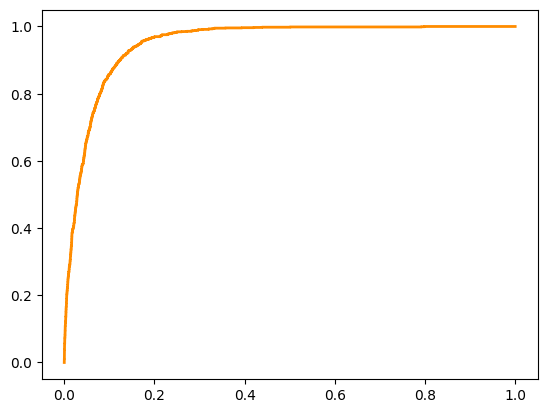

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(df_val_y.values, probabilities)
roc_auc = auc(fpr, tpr)
# get best threshold and plot it
best_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Best threshold: {best_threshold}")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# # plot roc
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()

For calls which are shorter than 1 min or 1.5 mins, it is most possible that user is going to say no. and for duration 0, which alredy means that we have not called user in this campaign. but if campain value is greater than 0 that means user is going to reject, because after many calls, there is no conversation more than 10-15 seconds, there is rejection, but still it could be happen that last time user was busy at time of call.

For calls more than 1500 seconds or calling more than 15 times there is no point to take them into analysis, because there are very few points whre call is going more than 1500 seconds and for calling multiple times there is catagorically no for that.

When it has bee a lot of gap from last call rejection is most probable at the time user will say no, for few days like at most 6-10 days, there is chance of 50-50 chance of acceptance or rejection, but for long time its 10 times possible that user is going to say no than yes.

I think this is due to we take a lot time to call, for user the process starts again. User is not interested at that time about what was happened last time.

In [ ]:
# Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# Object columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
# Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']